In [56]:
# Importaos las librerias conlas que comenzaremos a trabajar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import json
import os
import time 

Partimos del notebook llamado Get_Companies_Data.ipynb, en este realizamos un web scrapping , de la información de la listas de las 2000 companias más grandes del mundo según Forbes (https://www.forbes.com/lists/global2000/?sh=1a8f96f55ac0), de froma que de 2000 empresas obtuvimos información de 1763, es decir un 88% de los datos

# EDA INICAL DE LAS 1763 EMPRESAS OBTENIDAS
Ante de comenzar el EDA debemos realizar

In [57]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\companies_base_1763.csv"
# Load the Excel file into a DataFrame
df_companie_data_1763 = pd.read_csv(excel_file_path)
# Display the DataFrame
df_companie_data_1763.head()

,company_name,stock_ticker,company_location,current_stock_price,description,Industry,Founded,Headquarters,Country/Territory,CEO and Chair,...,President & CEO,CEO & Co-Founder,Co-CEOs,CEO & Founder,Chairman and Co-CEO,Chairman and Chief Executive Officer,"Co-Founder, Co-CEO and Chairman",Charter President,President & Representative Director,CEO and Chairman
0,JPMorgan Chase,NYSE: JPM,"New York, New York",$180.90,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,2000,"New York, New York",United States,James Dimon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,"Dhahran, Saudi Arabia",NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",1933,Dhahran,Saudi Arabia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,"Beijing, China",NaN,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,1984,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,"Beijing, China",NaN,China Construction Bank Corp. engages in the p...,Banking,1954,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,"Beijing, China",NaN,Agricultural Bank of China engages in the prov...,Banking and Financial Services,1951,Beijing,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Aprovechamiento de las Columnas de Datos

Para aprovechar al máximo las 85 columnas de datos, es crucial crear un diccionario de datos. Este diccionario nos ayudará a comprender el significado de cada columna y facilitará la selección de las más relevantes para nuestro análisis.

## Pasos para la Creación del Diccionario

### 1. Agrupar las Columnas por Categorías

- **Información financiera**: Ingresos, costos, gastos, activos, pasivos, etc.
- **Ratios financieros**: Rentabilidad, liquidez, solvencia, etc.
- **Información de mercado**: Precio de las acciones, volumen de negociación, capitalización de mercado, etc.
- **Información de la empresa**: Sector, industria, ubicación, empleados, etc.

### 2. Definir las Características de cada Columna

- **Nombre de la columna**: Descripción clara y concisa del contenido.
- **Tipo de dato**: Numérico, categórico, fecha, etc.
- **Descripción**: Explicación detallada del significado de los valores en la columna.
- **Fuente**: Indicar la fuente de la información.
- **Ejemplo**: Mostrar un ejemplo de valor para ilustrar el contenido de la columna.

### 3. Eliminar las Columnas Irrelevantes

- **Columnas con valores nulos o inconsistentes**: Eliminar las que no aportan información útil.
- **Columnas duplicadas**: Seleccionar solo una de las columnas duplicadas.
- **Columnas irrelevantes para el análisis**: Eliminar las que no se ajustan a los objetivos del estudio.

In [58]:
#cargamso el diccionario de datos
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\external\\Diccionario de datos.xlsx"
# Load the Excel file into a DataFrame
data_dict = pd.read_excel(excel_file_path)
# Display the DataFrame
data_dict

,Nombre_Columna,Categoría,Descripción,Se conserva
0,company_name,Información Básica,Nombre de la compañía,Se tiene en cuenta
1,stock_ticker,Información Básica,Símbolo de stock exchage:ticker,Se tiene en cuenta
2,company_location,Información Básica,Ciudad,Borrar
3,current_stock_price,Datos del Mercado de Valores,Precio actual dela acción,Borrar
4,description,Información Básica,Descripción detallada de compañía,Se tiene en cuenta
...,...,...,...,...
80,Chairman and Chief Executive Officer,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
81,"Co-Founder, Co-CEO and Chairman",Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
82,Charter President,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar
83,President & Representative Director,Información de los integrantes de la junta,se refieren a los roles de liderazgo dentro d...,Borrar


In [59]:
# Basado en el diccionario de datos obtenemos las columas a conservar
columnas_a_conservar = []

# Recorrer la tabla de muestra
for i in range(len(data_dict)):
    # Si la columna se conserva, agregarla a la lista
    if data_dict.loc[i, "Se conserva"] == "Se tiene en cuenta":
        columnas_a_conservar.append(data_dict.loc[i, "Nombre_Columna"])

# Imprimir la lista de columnas
print(columnas_a_conservar)

['company_name', 'stock_ticker', 'description', 'Industry', 'Country/Territory', 'Employees', 'Revenue', 'Assets', 'Profits', '52 Week Range', 'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E', 'Diluted EPS (ttm)', 'Price to Sales (ttm)', 'Price to Book Value (ttm)', 'Price to Tangible Book Value (ttm)', 'Total Enterprise Value to EBIT (ttm)', 'Total Enterprise Value to EBITDA (ttm)', 'Total Enterprise Value to Total Revenue (ttm)', 'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Margin (ttm)', 'Return on Assets (ttm)', 'Return on Equity (ttm)', 'Revenue (ttm)', 'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)', 'EBITDA Growth (y/o/y)', 'Diluted EPS Growth (y/o/y)', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity', 'Current Ratio', 'Consensus Recommendation', 'Consensus Price', 'Range of EPS', 'Consensus EPS', 'Consensus Revenue']


In [5]:
df_for_EDA = df_companie_data_1763[columnas_a_conservar]
df_for_EDA.head()

,company_name,stock_ticker,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,52 Week Range,...,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Consensus Recommendation,Consensus Price,Range of EPS,Consensus EPS,Consensus Revenue
0,JPMorgan Chase,NYSE: JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,123.11 x 180.99,...,$1.42T,210.17,$731.37B,NaN,NaN,Outperform,192.32,14.60 to 17.00,15.92,$161.98B
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Paso 1 revisión de valores nulos

In [6]:
# Count null por columna
null_counts = df_for_EDA.isnull().sum()
# Imprimir los resultados
print(null_counts)

company_name                                        1
stock_ticker                                     1169
description                                         0
Industry                                            8
Country/Territory                                   1
Employees                                          58
Revenue                                             1
Assets                                              7
Profits                                             7
52 Week Range                                    1205
Market Cap                                       1207
P/E Ratio (ttm)                                  1265
Forward P/E                                      1230
Diluted EPS (ttm)                                1208
Price to Sales (ttm)                             1215
Price to Book Value (ttm)                        1244
Price to Tangible Book Value (ttm)               1390
Total Enterprise Value to EBIT (ttm)             1295
Total Enterprise Value to EB

## Paso 2: Imputación de Datos Nulos

**Al revisar el número de datos nulos**, se observa que se perdería más del 80% de la información para el análisis. Por lo tanto, **es necesario realizar la imputación de los datos**. Para esto, se realizarán dos pasos:

1. **Utilizar el DataFrame `df_for_EDA` y realizar una búsqueda manual de los `stock_ticker`**.
2. **Con los `stock_ticker` completos, se utilizarán para imputar los datos financieros faltantes usando la API de Yahoo Finance**.

In [60]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\raw\\df_for_EDA_full_tickers.xlsx"
# Load the Excel file into a DataFrame
df_comp = pd.read_excel(excel_file_path)
# Display the DataFrame
df_comp.head()

,company_name,stock_ticker,Ticker1,Ticker2,description,Industry,Country/Territory,Employees,Revenue,Assets,...,Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Consensus Recommendation,Consensus Price,Range of EPS,Consensus EPS,Consensus Revenue
0,JPMorgan Chase,NYSE: JPM,JPM,NaN,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,...,$1.42T,21017.0,$731.37B,NaN,NaN,Outperform,19232.0,14.60 to 17.00,1592.0,$161.98B
1,Saudi Arabian Oil Company (Saudi Aramco),NaN,2222.SR,NaN,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICBC,NaN,601398.SS,1398.HK,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Construction Bank,NaN,601939.SS,0939.HK,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agricultural Bank of China,NaN,601288.SS,1288.HK,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_info_companies = df_comp[["company_name","Ticker1","description","Industry","Country/Territory","Employees","Revenue","Assets","Profits"]]

df_info_companies.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B


In [62]:
# Filtrar las filas donde la columna 'Combinada' es NaN y guardar los nombres de las empresas en una lista
company_no_ticker_name = df_info_companies[pd.isna(df_info_companies['Ticker1'])]['company_name'].tolist()
# Eliminar las filas donde la columna 'Combinada' es NaN
df_info_companies = df_info_companies.dropna(subset=['Ticker1'])
# Restablecer el índice del DataFrame después de eliminar filas
df_info_companies = df_info_companies.reset_index(drop=True)

# Mostrar el DataFrame resultante
df_info_companies

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B
...,...,...,...,...,...,...,...,...,...
1755,Alfa Laval,ALFA.ST,"Alfa Laval AB engages on energy optimization, ...",Capital Goods,Sweden,"19,002",$5.4B,$7.8B,$489.5M
1756,Gap,GPS.N,"Gap, Inc. operates as a global apparel retail ...","Clothing, Shoes, Sports Equipment",United States,"95,000",$15.6B,$11.4B,-$202M
1757,Yes Bank,YESBANK.NS,"YES BANK Ltd. is a holding company, which enga...",Banking,India,"21,136",$3.3B,$43.2B,$91.6M
1758,BEKB-BCBE,BEKB.SW,Berner Kantonalbank AG is a classical universa...,Banking,Switzerland,"1,146",$556M,$43B,$167.1M


In [10]:
# Lista de tickers de acciones para analizar
tickers = df_info_companies["Ticker1"].tolist() 

# Guarda en archivos json (Un para cada ticker), los resultados de cada consulta, en una carpeta llamada ticker_data

# Define the folder where the JSON files will be saved
ticker_data_folder = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\ticker_data_1760"

# Create the folder if it doesn't exist
!mkdir -p {ticker_data_folder}

Ya existe el subdirectorio o el archivo -p.
Error mientras se procesaba: -p.
Ya existe el subdirectorio o el archivo C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\ticker_data_1760.
Error mientras se procesaba: C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\ticker_data_1760.


In [24]:
# Esta función descarga la información de las acciones y las guarda en la carpeta "ticker_data_1760"
for ticker in tickers:
  # Ruta completa del archivo JSON
  json_file = os.path.join(ticker_data_folder, f"{ticker}.json")

  # Verifica si el archivo existe
  if not os.path.exists(json_file):
    # Obtiene la información del ticker
    accion = yf.Ticker(ticker)
    data = accion.info

    # Convierte la información a JSON
    json_data = json.dumps(data)

    # Escribe la información en el archivo
    with open(json_file, "w") as f:
      f.write(json_data)

  # Pausa de 2 segundos
  time.sleep(2)

KeyboardInterrupt: 

In [63]:
def crear_dataframe_tickers(ruta_archivo_ticker_data):
  """
  Crea un DataFrame a partir de archivos JSON del directorio ticker_data_1760.

  Args:
      ruta_archivo_ticker_data: Ruta al directorio que contiene los archivos JSON.

  Returns:
      Un DataFrame con las siguientes columnas:
          - Nombre del archivo
          - Sector
          - Symbol
          - Financial Currency
  """

  # Lista para almacenar los datos
  data = []

  # Recorrer los archivos JSON en el directorio
  for archivo in os.listdir(ruta_archivo_ticker_data):
    with open(os.path.join(ruta_archivo_ticker_data, archivo), 'r') as f:
      # Leer el archivo JSON
      ticker_data = json.load(f)

      # Extraer la información deseada
      nombre_archivo = archivo
      sector = ticker_data.get('sector', 'N/A')
      symbol = ticker_data.get('symbol', 'N/A')
      short_name = ticker_data.get('shortName', 'N/A')
      long_name= ticker_data.get('longName', 'N/A')
      financial_currency = ticker_data.get('financialCurrency', 'N/A')
      market_cap = ticker_data.get('marketCap', 'N/A')
      pe_ratio_ttm = ticker_data.get('trailingPE', 'N/A')
      forward_pe = ticker_data.get('forwardPE', 'N/A')
      diluted_eps_ttm = ticker_data.get('trailingEps', 'N/A')
      dividends_per_share = ticker_data.get('dividendRate', 'N/A')
      dividend_yield = ticker_data.get('dividendYield', 'N/A')
      ex_dividend_date = ticker_data.get('exDividendDate', 'N/A')
      price_to_sales_ttm = ticker_data.get('priceToSalesTrailing12Months', 'N/A')
      price_to_book_value_ttm = ticker_data.get('priceToBook', 'N/A')
      gross_margin_ttm = ticker_data.get('grossMargins', 'N/A')
      operating_margin_ttm = ticker_data.get('operatingMargins', 'N/A')
      net_margin_ttm = ticker_data.get('profitMargins', 'N/A')
      return_on_assets_ttm = ticker_data.get('returnOnAssets', 'N/A')
      return_on_equity_ttm = ticker_data.get('returnOnEquity', 'N/A')
      revenue_ttm = ticker_data.get('revenue', 'N/A')
      revenue_per_share_ttm = ticker_data.get('revenuePerShare', 'N/A')
      revenue_growth_yoy = ticker_data.get('revenueGrowth', 'N/A')
      ebitda_ttm = ticker_data.get('ebitda', 'N/A')
      total_cash = ticker_data.get('totalCash', 'N/A')
      total_cash_per_share = ticker_data.get('totalCashPerShare', 'N/A')
      total_debt = ticker_data.get('totalDebt', 'N/A')
      total_debt_equity = ticker_data.get('debtToEquity', 'N/A')
      current_ratio = ticker_data.get('currentRatio', 'N/A')
      range_of_price_targets = (ticker_data.get('targetLowPrice', 'N/A'), ticker_data.get('targetHighPrice', 'N/A'))

      # Agregar la información a la lista
      data.append({
          'Nombre del archivo': nombre_archivo,
          'Sector': sector,
          'Symbol': symbol,
          'Short Name':short_name,
          'Long Name':long_name,
          'Financial Currency': financial_currency,
          'Market Cap': market_cap,
          'P/E Ratio (ttm)': pe_ratio_ttm,
          'Forward P/E': forward_pe,
          'Diluted EPS (ttm)': diluted_eps_ttm,
          'Dividends Per Share': dividends_per_share,
          'Dividend Yield': dividend_yield ,
          'Ex-Dividend Date': ex_dividend_date,
          'Price to Sales (ttm)': price_to_sales_ttm ,
          'Price to Book Value (ttm)': price_to_book_value_ttm ,
          'Gross Margin (ttm)': gross_margin_ttm,
          'Operating Margin (ttm)': operating_margin_ttm,
          'Net Margin (ttm)': net_margin_ttm,
          'Return on Assets (ttm)': return_on_assets_ttm,
          'Return on Equity (ttm)': return_on_equity_ttm ,
          'Revenue (ttm)': revenue_ttm,
          'Revenue Per Share (ttm)': revenue_per_share_ttm,
          'Revenue Growth (y/o/y)': revenue_growth_yoy ,
          'EBITDA (ttm)': ebitda_ttm,
          'Total Cash': total_cash ,
          'Total Cash Per Share': total_cash_per_share,
          'Total Debt': total_debt ,
          'Total Debt/Equity': total_debt_equity,
          'Current Ratio': current_ratio,
          'Range of Price Targets': range_of_price_targets,
      })

  # Crear un DataFrame a partir de la lista
  df = pd.DataFrame(data)

  return df

In [64]:
df_datos_finanacieros = crear_dataframe_tickers(ticker_data_folder)

In [65]:
df_datos_finanacieros

,Nombre del archivo,Sector,Symbol,Short Name,Long Name,Financial Currency,Market Cap,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,000002.SZ.json,Real Estate,000002.SZ,CHINA VANKE CO,"China Vanke Co., Ltd.",CNY,102636716032,5.766871,42.727272,1.63,...,N/A,39.082,-0.316,41084788736,101244403712,8.538,347420033024,85.334,1.371,"(1.0, 2.57)"
1,000069.SZ.json,Consumer Cyclical,000069.SZ,SHENZHEN OVERSEAS,"Shenzhen Overseas Chinese Town Co.,Ltd.",CNY,23389882368,N/A,10.392858,-1.76,...,N/A,9.742,0.403,-1938736384,44277800960,5.509,141744406528,148.538,1.678,"(2.3, 6.03)"
2,000100.SZ.json,Technology,000100.SZ,TCL TECHNOLOGY GRO,TCL Technology Group Corporation,CNY,85632688128,57.0,9.702127,0.08,...,N/A,9.759,0.142,26715838464,45126356992,2.436,172931514368,119.123,1.186,"(4.3, 5.5)"
3,000270.KS.json,Consumer Cyclical,000270.KS,KIA CORP.,Kia Corporation,KRW,45692584198144,N/A,5.101147,N/A,...,N/A,252083.88,0.05,13964034441216,20661596585984,52148.51,4127631081472,8.866,1.459,"(97000.0, 160000.0)"
4,000333.SZ.json,Consumer Cyclical,000333.SZ,MIDEA GROUP CO LTD,"Midea Group Co., Ltd.",CNY,422025625600,12.614583,11.317757,4.8,...,N/A,52.722,0.092,38063738880,123658682368,17.985,84504707072,53.402,1.115,"(62.0, 103.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Z74.SI.json,Communication Services,Z74.SI,Singtel,Singapore Telecommunications Limited,SGD,41753350144,13.315789,14.882353,0.19,...,N/A,0.864,-0.032,3206324992,1827100032,0.111,11262499840,41.39,N/A,"(2.8, 3.5)"
1256,ZBH.json,Healthcare,ZBH,"Zimmer Biomet Holdings, Inc.","Zimmer Biomet Holdings, Inc.",USD,26060023808,26.038933,14.639401,4.88,...,N/A,35.43,0.063,2448900096,415800000,2.027,6208000000,49.711,1.613,"(109.0, 160.0)"
1257,ZION.json,Financial Services,ZION,Zions Bancorporation N.A.,"Zions Bancorporation, National Association",USD,6141594624,9.565517,8.967672,4.35,...,N/A,20.19,-0.119,N/A,3608999936,24.36,5452000256,N/A,N/A,"(40.0, 51.0)"
1258,ZTS.json,Healthcare,ZTS,Zoetis Inc.,Zoetis Inc.,USD,77068181504,33.13386,25.97531,5.08,...,N/A,18.527,0.085,3488000000,2040999936,4.458,6838000128,137.007,3.358,"(200.0, 260.0)"


In [66]:
# Uniendo los DataFrames
df_datos_finales = pd.merge(df_info_companies, df_datos_finanacieros, left_on='Ticker1', right_on='Symbol', how='inner')

In [67]:
df_datos_finales

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,JPM.json,...,N/A,49.687,0.111,N/A,1421310033920,493.447,731371995136,N/A,N/A,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,2222.SR.json,...,N/A,7.673,-0.057,951544971264,385298989056,1.592,290168012800,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,601398.SS.json,...,N/A,0.714,-0.021,N/A,5982225170432,16.785,2279343128576,N/A,N/A,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,601939.SS.json,...,N/A,2.715,0.035,N/A,2282935025664,9.131,3209271967744,N/A,N/A,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,601288.SS.json,...,N/A,1.673,0.036,N/A,6289219911680,17.97,3701659926528,N/A,N/A,"(2.36, 5.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,"HengYi Petrochemical Co., Ltd. engages in the ...",Household & Personal Products,China,"15,637",$21.4B,$15.6B,-$259.2M,600000.SS.json,...,N/A,5.056,2.825,N/A,1331338018816,45.358,2057828040704,N/A,N/A,"(3.8, 9.0)"
1172,Orient Securities,600958.SS,"Orient Securities Co., Ltd. engages in the pro...",Diversified Financials,China,"8,391",$2.5B,$52.9B,$403.1M,600958.SS.json,...,N/A,1.864,-0.497,N/A,195054632960,22.957,156941549568,199.434,N/A,"(4.2, 12.38)"
1173,Tokyo Kiraboshi Financial Group,8604.T,"Tokyo Kiraboshi Financial Group, Inc. engages ...",Banking,Japan,"2,753",$843M,$49.9B,$176.2M,8604.T.json,...,N/A,476.592,0.017,N/A,29879921803264,9912.335,33418825957376,994.416,1.318,"(650.0, 950.0)"
1174,Jinshang Bank,601669.SS,"Jinshang Bank Co., Ltd. provides banking servi...",Banking,China,"4,402",$1.9B,$48.4B,$274M,601669.SS.json,...,N/A,32.007,0.065,47000317952,104569929728,6.07,453986746368,171.337,0.926,"(7.68, 10.0)"


In [47]:
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_datos_financieros_final.csv"
# Save the DataFrame as a CSV file
df_datos_finales.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\data\processed\df_datos_financieros_final.csv


In [68]:
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_datos_financieros_final.csv"
# Load the Excel file into a DataFrame
df_datos_finales = pd.read_csv(csv_file_path)
# Display the DataFrame
df_datos_finales.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,"293,723",$179.9B,$3.7T,$41.8B,JPM.json,...,NaN,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,"70,000",$589.5B,$661B,$156.4B,2222.SR.json,...,NaN,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,"427,587",$216.8B,$6.1T,$52.5B,601398.SS.json,...,NaN,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,"352,588",$203.1B,$5T,$48.3B,601939.SS.json,...,NaN,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,"459,000",$186.1B,$5.4T,$37.9B,601288.SS.json,...,NaN,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN,"(2.36, 5.29)"


In [69]:
df_datos_finales['Employees'] = df_datos_finales['Employees'].str.replace(',', '').astype(float)

In [70]:
df_datos_finales.dtypes

company_name                  object
Ticker1                       object
description                   object
Industry                      object
Country/Territory             object
Employees                    float64
Revenue                       object
Assets                        object
Profits                       object
Nombre del archivo            object
Sector                        object
Symbol                        object
Short Name                    object
Long Name                     object
Financial Currency            object
Market Cap                   float64
P/E Ratio (ttm)              float64
Forward P/E                  float64
Diluted EPS (ttm)            float64
Dividends Per Share          float64
Dividend Yield               float64
Ex-Dividend Date             float64
Price to Sales (ttm)         float64
Price to Book Value (ttm)    float64
Gross Margin (ttm)           float64
Operating Margin (ttm)       float64
Net Margin (ttm)             float64
R

In [71]:
print(df_datos_finales.columns)

Index(['company_name', 'Ticker1', 'description', 'Industry',
       'Country/Territory', 'Employees', 'Revenue', 'Assets', 'Profits',
       'Nombre del archivo', 'Sector', 'Symbol', 'Short Name', 'Long Name',
       'Financial Currency', 'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E',
       'Diluted EPS (ttm)', 'Dividends Per Share', 'Dividend Yield',
       'Ex-Dividend Date', 'Price to Sales (ttm)', 'Price to Book Value (ttm)',
       'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Margin (ttm)',
       'Return on Assets (ttm)', 'Return on Equity (ttm)', 'Revenue (ttm)',
       'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)',
       'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio', 'Range of Price Targets'],
      dtype='object')


## Revision de datos nullos por filas

In [72]:
import numpy as np
def limpiar_datos_nulos_y_na(df):
    # Reemplaza 'N/A' con NaN para asegurarse de que sean tratados como valores nulos
    df.replace('N/A', np.nan, inplace=True)
    
    # Calcula el número total de columnas
    total_columnas = df.shape[1]
    
    # Calcula el límite de datos nulos permitidos por fila (20% del total de columnas)
    limite_nulos = total_columnas * 0.2
    
    # Calcula el número de datos nulos por fila
    nulos_por_fila = df.isnull().sum(axis=1)
    
    # Filtra las filas que tienen más del 20% de datos nulos
    filas_a_mantener = nulos_por_fila <= limite_nulos
    
    # Retorna el DataFrame filtrado
    return df[filas_a_mantener]

In [73]:
# Aplica la función al DataFrame
df_datos_finales_limpio = limpiar_datos_nulos_y_na(df_datos_finales)


In [74]:
df_datos_finales_limpio 

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Revenue (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,$179.9B,$3.7T,$41.8B,JPM.json,...,NaN,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,$589.5B,$661B,$156.4B,2222.SR.json,...,NaN,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,$216.8B,$6.1T,$52.5B,601398.SS.json,...,NaN,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,$203.1B,$5T,$48.3B,601939.SS.json,...,NaN,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,$186.1B,$5.4T,$37.9B,601288.SS.json,...,NaN,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN,"(2.36, 5.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,"HengYi Petrochemical Co., Ltd. engages in the ...",Household & Personal Products,China,15637.0,$21.4B,$15.6B,-$259.2M,600000.SS.json,...,NaN,5.056,2.825,NaN,1.331338e+12,45.358,2.057828e+12,NaN,NaN,"(3.8, 9.0)"
1172,Orient Securities,600958.SS,"Orient Securities Co., Ltd. engages in the pro...",Diversified Financials,China,8391.0,$2.5B,$52.9B,$403.1M,600958.SS.json,...,NaN,1.864,-0.497,NaN,1.950546e+11,22.957,1.569415e+11,199.434,NaN,"(4.2, 12.38)"
1173,Tokyo Kiraboshi Financial Group,8604.T,"Tokyo Kiraboshi Financial Group, Inc. engages ...",Banking,Japan,2753.0,$843M,$49.9B,$176.2M,8604.T.json,...,NaN,476.592,0.017,NaN,2.987992e+13,9912.335,3.341883e+13,994.416,1.318,"(650.0, 950.0)"
1174,Jinshang Bank,601669.SS,"Jinshang Bank Co., Ltd. provides banking servi...",Banking,China,4402.0,$1.9B,$48.4B,$274M,601669.SS.json,...,NaN,32.007,0.065,4.700032e+10,1.045699e+11,6.070,4.539867e+11,171.337,0.926,"(7.68, 10.0)"


## Revisión de datos nulos por columnas

In [75]:
def limpiar_columnas_con_datos_nulos_y_na(df):
    # Reemplaza 'N/A' con NaN para asegurarse de que sean tratados como valores nulos
    df.replace('N/A', np.nan, inplace=True)
    
    # Calcula el número total de filas
    total_filas = df.shape[0]
    
    # Calcula el límite de datos nulos permitidos por columna (20% del total de filas)
    limite_nulos = total_filas * 0.2
    
    # Calcula el número de datos nulos por columna
    nulos_por_columna = df.isnull().sum()
    
    # Encuentra las columnas que tienen menos del 20% de datos nulos
    columnas_a_mantener = nulos_por_columna <= limite_nulos
    
    # Filtra el DataFrame para mantener solo esas columnas
    df_filtrado = df.loc[:, columnas_a_mantener]
    
    return df_filtrado


In [76]:
# Aplica la función al DataFrame
df_datos_finales_limpio = limpiar_columnas_con_datos_nulos_y_na(df_datos_finales_limpio)

C:\Users\sjess\AppData\Local\Temp\ipykernel_21452\2441058714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('N/A', np.nan, inplace=True)


In [77]:
df_datos_finales_limpio 

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Return on Equity (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,$179.9B,$3.7T,$41.8B,JPM.json,...,0.15979,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,$589.5B,$661B,$156.4B,2222.SR.json,...,0.26725,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,$216.8B,$6.1T,$52.5B,601398.SS.json,...,0.10224,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,$203.1B,$5T,$48.3B,601939.SS.json,...,0.11199,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,$186.1B,$5.4T,$37.9B,601288.SS.json,...,0.09865,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN,"(2.36, 5.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,"HengYi Petrochemical Co., Ltd. engages in the ...",Household & Personal Products,China,15637.0,$21.4B,$15.6B,-$259.2M,600000.SS.json,...,0.05131,5.056,2.825,NaN,1.331338e+12,45.358,2.057828e+12,NaN,NaN,"(3.8, 9.0)"
1172,Orient Securities,600958.SS,"Orient Securities Co., Ltd. engages in the pro...",Diversified Financials,China,8391.0,$2.5B,$52.9B,$403.1M,600958.SS.json,...,0.03524,1.864,-0.497,NaN,1.950546e+11,22.957,1.569415e+11,199.434,NaN,"(4.2, 12.38)"
1173,Tokyo Kiraboshi Financial Group,8604.T,"Tokyo Kiraboshi Financial Group, Inc. engages ...",Banking,Japan,2753.0,$843M,$49.9B,$176.2M,8604.T.json,...,0.03726,476.592,0.017,NaN,2.987992e+13,9912.335,3.341883e+13,994.416,1.318,"(650.0, 950.0)"
1174,Jinshang Bank,601669.SS,"Jinshang Bank Co., Ltd. provides banking servi...",Banking,China,4402.0,$1.9B,$48.4B,$274M,601669.SS.json,...,0.06465,32.007,0.065,4.700032e+10,1.045699e+11,6.070,4.539867e+11,171.337,0.926,"(7.68, 10.0)"


In [78]:
print(df_datos_finales_limpio.columns)

Index(['company_name', 'Ticker1', 'description', 'Industry',
       'Country/Territory', 'Employees', 'Revenue', 'Assets', 'Profits',
       'Nombre del archivo', 'Sector', 'Symbol', 'Short Name', 'Long Name',
       'Financial Currency', 'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E',
       'Diluted EPS (ttm)', 'Dividends Per Share', 'Dividend Yield',
       'Ex-Dividend Date', 'Price to Sales (ttm)', 'Price to Book Value (ttm)',
       'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Margin (ttm)',
       'Return on Assets (ttm)', 'Return on Equity (ttm)',
       'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)',
       'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio', 'Range of Price Targets'],
      dtype='object')


## Manejo de tipos de datos, teniendo en cuenta homologación de moneda, dejamos todo en dolares

In [79]:
def convert_to_billions(value: str) -> float:
    value = value.replace('$', '').strip()
    if 'T' in value:
        # Si el valor está en trillones, multiplica por 1,000 para convertir a billones
        return float(value.replace('T', '')) * 1000
    elif 'B' in value:
        # Si el valor está en billones, simplemente quita la 'B' y convierte a float
        return float(value.replace('B', ''))
    elif 'M' in value:
        # Si el valor está en millones, divide entre 1,000 para convertir a billones
        return float(value.replace('M', '')) / 1000
    else:
        # Asume que el valor ya está en billones si no tiene especificador
        return float(value)

In [80]:
# Aplica la función convert_to_billions a las columnas específicas
for columna in ['Revenue', 'Assets', 'Profits']:
    # Comprueba primero si la columna existe en el DataFrame para evitar errores
    if columna in df_datos_finales_limpio.columns:
        df_datos_finales_limpio[columna] = df_datos_finales_limpio[columna].apply(lambda x: convert_to_billions(x) if pd.notnull(x) else np.nan)

df_datos_finales_limpio

C:\Users\sjess\AppData\Local\Temp\ipykernel_21452\2133056237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datos_finales_limpio[columna] = df_datos_finales_limpio[columna].apply(lambda x: convert_to_billions(x) if pd.notnull(x) else np.nan)


,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Nombre del archivo,...,Return on Equity (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio,Range of Price Targets
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,179.900,3700.0,41.8000,JPM.json,...,0.15979,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN,"(157.7, 221.0)"
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.500,661.0,156.4000,2222.SR.json,...,0.26725,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304,"(30.98, 37.94)"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,216.800,6100.0,52.5000,601398.SS.json,...,0.10224,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN,"(3.57, 6.3)"
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,203.100,5000.0,48.3000,601939.SS.json,...,0.11199,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN,"(5.6, 8.78)"
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,186.100,5400.0,37.9000,601288.SS.json,...,0.09865,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN,"(2.36, 5.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,"HengYi Petrochemical Co., Ltd. engages in the ...",Household & Personal Products,China,15637.0,21.400,15.6,-0.2592,600000.SS.json,...,0.05131,5.056,2.825,NaN,1.331338e+12,45.358,2.057828e+12,NaN,NaN,"(3.8, 9.0)"
1172,Orient Securities,600958.SS,"Orient Securities Co., Ltd. engages in the pro...",Diversified Financials,China,8391.0,2.500,52.9,0.4031,600958.SS.json,...,0.03524,1.864,-0.497,NaN,1.950546e+11,22.957,1.569415e+11,199.434,NaN,"(4.2, 12.38)"
1173,Tokyo Kiraboshi Financial Group,8604.T,"Tokyo Kiraboshi Financial Group, Inc. engages ...",Banking,Japan,2753.0,0.843,49.9,0.1762,8604.T.json,...,0.03726,476.592,0.017,NaN,2.987992e+13,9912.335,3.341883e+13,994.416,1.318,"(650.0, 950.0)"
1174,Jinshang Bank,601669.SS,"Jinshang Bank Co., Ltd. provides banking servi...",Banking,China,4402.0,1.900,48.4,0.2740,601669.SS.json,...,0.06465,32.007,0.065,4.700032e+10,1.045699e+11,6.070,4.539867e+11,171.337,0.926,"(7.68, 10.0)"


In [81]:
# Define las columnas a eliminar
columnas_a_eliminar = ['Nombre del archivo', 'Symbol', 'Short Name', 'Long Name', 'Range of Price Targets', 'Ex-Dividend Date']

# Realiza el drop de las columnas especificadas
df_datos_finales_limpio = df_datos_finales_limpio.drop(columns=columnas_a_eliminar, errors='ignore')
df_datos_finales_limpio.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,...,Return on Assets (ttm),Return on Equity (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,...,0.01314,0.15979,49.687,0.111,NaN,1.421310e+12,493.447,7.313720e+11,NaN,NaN
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,...,0.21826,0.26725,7.673,-0.057,9.515450e+11,3.852990e+11,1.592,2.901680e+11,16.704,2.304
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,...,0.00864,0.10224,0.714,-0.021,NaN,5.982225e+12,16.785,2.279343e+12,NaN,NaN
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,...,0.00917,0.11199,2.715,0.035,NaN,2.282935e+12,9.131,3.209272e+12,NaN,NaN
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,...,0.00742,0.09865,1.673,0.036,NaN,6.289220e+12,17.970,3.701660e+12,NaN,NaN


In [82]:
columnas_a_convertir = [
    'Market Cap', 'P/E Ratio (ttm)', 'Forward P/E', 'Diluted EPS (ttm)',
    'Dividends Per Share', 'Dividend Yield', 'Price to Sales (ttm)',
    'Price to Book Value (ttm)', 'Gross Margin (ttm)', 'Operating Margin (ttm)',
    'Net Margin (ttm)', 'Return on Assets (ttm)', 'Return on Equity (ttm)',
    'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)',
    'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
    'Current Ratio', 'Employees'
]

# Convierte cada columna especificada a tipo float, usando errors='coerce' para convertir valores no numéricos a NaN
for columna in columnas_a_convertir:
    if columna in df_datos_finales_limpio.columns:
        df_datos_finales_limpio[columna] = pd.to_numeric(df_datos_finales_limpio[columna], errors='coerce')

In [83]:
print(df_datos_finales_limpio.columns)
print(df_datos_finales_limpio.dtypes)

Index(['company_name', 'Ticker1', 'description', 'Industry',
       'Country/Territory', 'Employees', 'Revenue', 'Assets', 'Profits',
       'Sector', 'Financial Currency', 'Market Cap', 'P/E Ratio (ttm)',
       'Forward P/E', 'Diluted EPS (ttm)', 'Dividends Per Share',
       'Dividend Yield', 'Price to Sales (ttm)', 'Price to Book Value (ttm)',
       'Gross Margin (ttm)', 'Operating Margin (ttm)', 'Net Margin (ttm)',
       'Return on Assets (ttm)', 'Return on Equity (ttm)',
       'Revenue Per Share (ttm)', 'Revenue Growth (y/o/y)', 'EBITDA (ttm)',
       'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Total Debt/Equity',
       'Current Ratio'],
      dtype='object')
company_name                  object
Ticker1                       object
description                   object
Industry                      object
Country/Territory             object
Employees                    float64
Revenue                      float64
Assets                       float64
Profits          

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Reemplazar valores infinitos por NaN
df_datos_finales_limpio.replace([np.inf, -np.inf], np.nan, inplace=True)

# Crear un pipeline para manejar los datos nulos en las columnas numéricas
numeric_features = df_datos_finales_limpio.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Aplicar el pipeline a las columnas numéricas
df_datos_finales_limpio[numeric_features] = numeric_transformer.fit_transform(df_datos_finales_limpio[numeric_features])

# Verificar la limpieza de los datos
null_counts = df_datos_finales_limpio.isnull().sum()

# Mostrar las primeras filas del DataFrame limpio y el conteo de valores nulos restantes
print(df_datos_finales_limpio.head())
print(null_counts)

                               company_name    Ticker1  \
0                            JPMorgan Chase        JPM   
1  Saudi Arabian Oil Company (Saudi Aramco)    2222.SR   
2                                      ICBC  601398.SS   
3                   China Construction Bank  601939.SS   
4                Agricultural Bank of China  601288.SS   

                                         description  \
0  JPMorgan Chase & Co. is a financial holding co...   
1  Saudi Arabian Oil Co. engages in the explorati...   
2  Industrial & Commercial Bank of China Ltd. eng...   
3  China Construction Bank Corp. engages in the p...   
4  Agricultural Bank of China engages in the prov...   

                                            Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                 

Vamos a relazar el analis descrioptivo delos datos 

In [85]:
# Obtén estadísticas descriptivas
estadisticas_descriptivas = df_datos_finales_limpio.describe()
estadisticas_descriptivas

,Employees,Revenue,Assets,Profits,Market Cap,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),Dividends Per Share,Dividend Yield,...,Return on Assets (ttm),Return on Equity (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),EBITDA (ttm),Total Cash,Total Cash Per Share,Total Debt,Total Debt/Equity,Current Ratio
count,1.099000e+03,1099.000000,1099.000000,1099.000000,1.099000e+03,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,...,1099.000000,1099.000000,1.099000e+03,1099.000000,1.099000e+03,1.099000e+03,1.099000e+03,1.099000e+03,1099.000000,1099.000000
mean,6.107524e+04,35.501329,162.523612,3.289112,1.651980e+12,33.888383,49.707704,46.965127,91.744140,0.032986,...,0.047984,0.396836,1.578046e+04,0.055065,3.034782e+11,1.180009e+12,3.411762e+03,1.458564e+12,130.158128,2.235740
std,1.064627e+05,56.799711,473.812818,8.184056,1.670403e+13,182.069633,461.547360,166.006532,649.596573,0.027300,...,0.046704,6.828521,1.329720e+05,0.365009,2.443314e+12,9.807068e+12,3.906503e+04,8.610421e+12,382.296490,8.832513
min,1.500000e+01,-25.500000,2.800000,-23.100000,1.122717e+08,1.814493,-509.083340,-382.560000,0.010000,0.000200,...,-0.119650,-1.908630,-6.774000e+00,-0.948000,-7.808400e+10,1.640000e+07,1.900000e-02,2.416630e+07,0.045000,0.191000
25%,1.278400e+04,10.000000,22.100000,0.825150,2.507263e+10,10.568711,8.986830,1.370000,0.900000,0.017350,...,0.016860,0.077750,1.704900e+01,-0.066000,3.136150e+09,1.994323e+09,3.232500e+00,7.667500e+09,42.389500,1.006500
50%,2.902600e+04,18.200000,42.850000,1.500000,6.980451e+10,16.504139,12.883085,4.335000,2.080000,0.028600,...,0.037360,0.123785,4.421700e+01,0.026000,6.448000e+09,1.053993e+10,1.035100e+01,2.586250e+10,72.541500,1.299000
75%,6.641750e+04,35.900000,102.150000,3.300000,2.678836e+11,26.523934,18.685118,11.845000,4.920000,0.041500,...,0.064545,0.199140,1.631040e+02,0.112000,2.458953e+10,1.485660e+11,5.519850e+01,2.055435e+11,121.328000,1.684500
max,1.600000e+06,611.300000,6100.000000,156.400000,5.275496e+14,4202.500500,13871.429000,2912.310000,11400.000000,0.440000,...,0.385510,225.736830,2.355294e+06,4.691000,5.861211e+13,2.010816e+14,1.119765e+06,1.374880e+14,6724.821000,207.309000


## Manejo de Monedas y Homologación a Billones de Dólares

Esto se hará para las columnas Market Cap, EBITDA (ttm), Total Cash, Total Debt.

In [86]:
# Obtener los valores únicos
monedas_unicas = df_datos_finales_limpio['Financial Currency'].unique()

# Mostrar los valores únicos
monedas_unicas

array(['USD', 'SAR', 'CNY', 'JPY', 'KRW', 'EUR', 'CAD', 'TWD', 'BRL',
       'CHF', 'AUD', 'GBP', 'INR', 'SGD', 'SEK', 'DKK', 'THB', 'PLN',
       'COP', 'MXN', 'NOK', 'CZK', 'HKD', 'KWD', 'TRY', 'CLP', 'ILS',
       'PEN', 'QAR'], dtype=object)

In [87]:
def convert_to_billions_usd(value, currency):

    rates = { "USD": 1.0,"SAR": 0.265,"CNY": 0.147,"JPY": 0.0091,"KRW": 0.00076,
    "EUR": 1.08,"CAD": 0.78,"TWD": 0.032,"BRL": 0.18,"CHF": 1.03,"AUD": 0.73,
    "GBP": 1.24,"INR": 0.013,"SGD": 0.71,"SEK": 0.10,"DKK": 0.14,"THB": 0.029,
    "PLN": 0.23,"COP": 0.00023,"MXN": 0.052,"NOK": 0.10,"CZK": 0.042,"HKD": 0.13,
    "KWD": 3.29,"TRY": 0.056,"CLP": 0.0012,"ILS": 0.28,"PEN": 0.27,"QAR": 0.27,
    }

    # Asegurar que el valor está en miles y convertir a la moneda base (USD)
    if currency in rates:
        usd_value = (value * 1000) * rates[currency]  # Convertir de miles y moneda a USD
    else:
        print(f"La moneda '{currency}' no está en el diccionario de tasas de cambio.")
        return None

        # Convertir el valor de USD a billones de USD
    usd_value_in_billions = usd_value / 10**12
    
    return usd_value_in_billions


In [88]:
# Aplicar la función a la columna 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt'
df_datos_finales_limpio['Market Cap USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Market Cap'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['EBITDA (ttm) USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['EBITDA (ttm)'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['Total Cash USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Total Cash'], x['Financial Currency']), axis=1)
df_datos_finales_limpio['Total Debt USD'] = df_datos_finales_limpio.apply(lambda x: convert_to_billions_usd(x['Total Debt'], x['Financial Currency']), axis=1)

In [89]:
# Drop las columnas que ya no necesitamos 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt' 
df_datos_finales_limpio.drop(['Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt'], axis=1, inplace=True)

# Muestra las primeras filas para verificar la conversión
df_datos_finales_limpio.head(10)

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,...,Return on Equity (ttm),Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,...,0.15979,49.687,0.111,493.447,72.5415,1.299,573.366403,6.448000,1421.310034,731.371995
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,...,0.26725,7.673,-0.057,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,...,0.10224,0.714,-0.021,16.785,72.5415,1.299,253.621212,0.947856,879.387100,335.063440
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,...,0.11199,2.715,0.035,9.131,72.5415,1.299,167.292783,0.947856,335.591449,471.762979
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,...,0.09865,1.673,0.036,17.970,72.5415,1.299,208.051584,0.947856,924.515327,544.144009
5,Bank of America,BAC,Bank of America Corp. is a bank and financial ...,Banking and Financial Services,United States,171430.0,133.8,3200.0,28.6,Financial Services,...,0.09388,11.731,-0.110,101.758,72.5415,1.299,295.977878,6.448000,801.104986,681.469018
6,Alphabet,GOOGL,"Alphabet, Inc. is a holding company, which eng...","IT, Internet, Software & Services",United States,190234.0,282.8,369.5,58.6,Communication Services,...,0.27356,24.338,0.135,8.921,10.5400,2.097,1840.394928,100.171997,110.916002,29.867000
7,ExxonMobil,XOM,"Exxon Mobil Corp. engages in the exploration, ...","Construction, Chemicals, Raw Materials",United States,37200.0,393.2,369.4,61.7,Energy,...,0.18001,83.488,-0.118,7.949,22.4470,1.479,450.310144,67.654001,31.538999,47.709000
8,Microsoft,MSFT,Microsoft Corp. engages in the development and...,IT Software & Services,United States,122000.0,207.6,380.1,69.0,Technology,...,0.39174,30.612,0.176,10.899,46.7360,1.218,3190.408086,118.427001,80.982000,111.358001
9,Apple,AAPL,"Apple, Inc. engages in the design, manufacture...","Semiconductors, Electronics, Electrical Engine...",United States,164000.0,385.1,332.2,94.3,Technology,...,1.54269,24.648,0.021,4.734,145.8030,1.073,2646.278144,130.108998,73.100001,108.040004


In [128]:

# Identifica columnas numéricas
columnas_numericas = df_datos_finales_limpio.select_dtypes(include=[np.number]).columns.tolist()

# Detección de outliers usando IQR
for columna in columnas_numericas:
    Q1 = df_datos_finales_limpio[columna].quantile(0.25)
    Q3 = df_datos_finales_limpio[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = ~((df_datos_finales_limpio[columna] < (Q1 - 1.5 * IQR)) | (df_datos_finales_limpio[columna] > (Q3 + 1.5 * IQR)))
    print(f"Outliers en {columna}: {~filtro.sum()}")  # Cuenta el número de outliers por columna

Outliers en Employees: -999
Outliers en Revenue: -987
Outliers en Assets: -947
Outliers en Profits: -987
Outliers en P/E Ratio (ttm): -1024
Outliers en Forward P/E: -1018
Outliers en Diluted EPS (ttm): -931
Outliers en Dividends Per Share: -920
Outliers en Dividend Yield: -1058
Outliers en Price to Sales (ttm): -1007
Outliers en Price to Book Value (ttm): -960
Outliers en Gross Margin (ttm): -1066
Outliers en Operating Margin (ttm): -1041
Outliers en Net Margin (ttm): -1043
Outliers en Return on Assets (ttm): -1039
Outliers en Return on Equity (ttm): -992
Outliers en Revenue Per Share (ttm): -909
Outliers en Revenue Growth (y/o/y): -1005
Outliers en Total Cash Per Share: -892
Outliers en Total Debt/Equity: -1015
Outliers en Current Ratio: -991
Outliers en Market Cap USD: -985
Outliers en EBITDA (ttm) USD: -1017
Outliers en Total Cash USD: -939
Outliers en Total Debt USD: -972


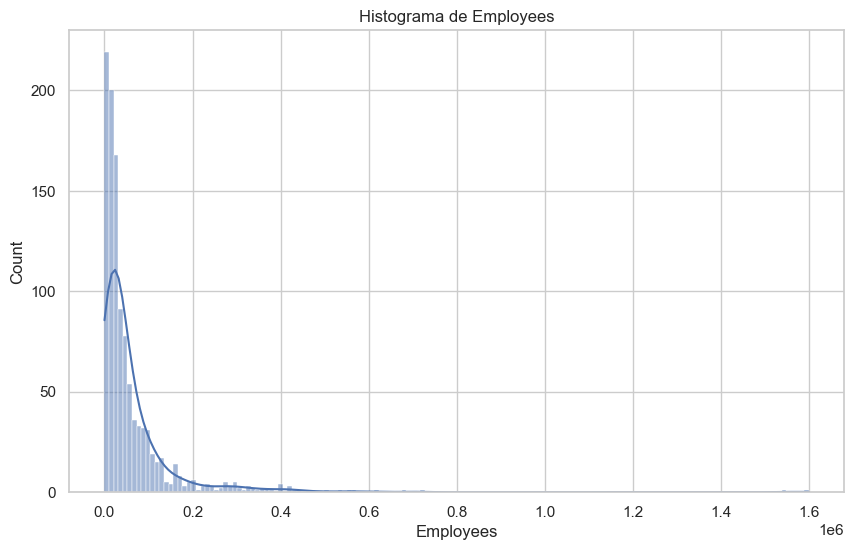

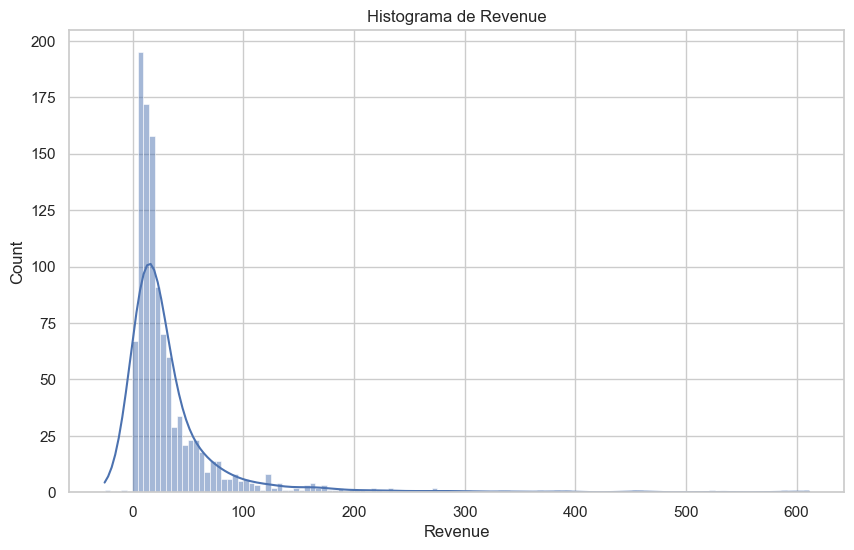

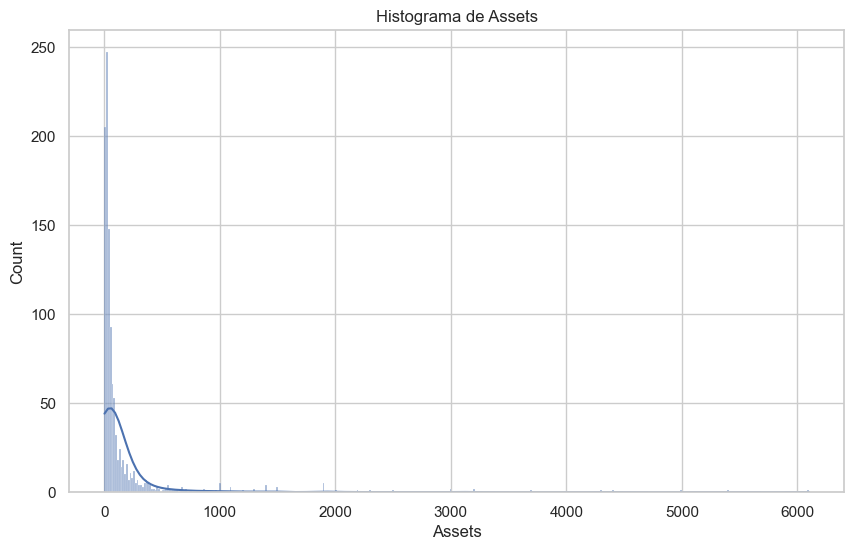

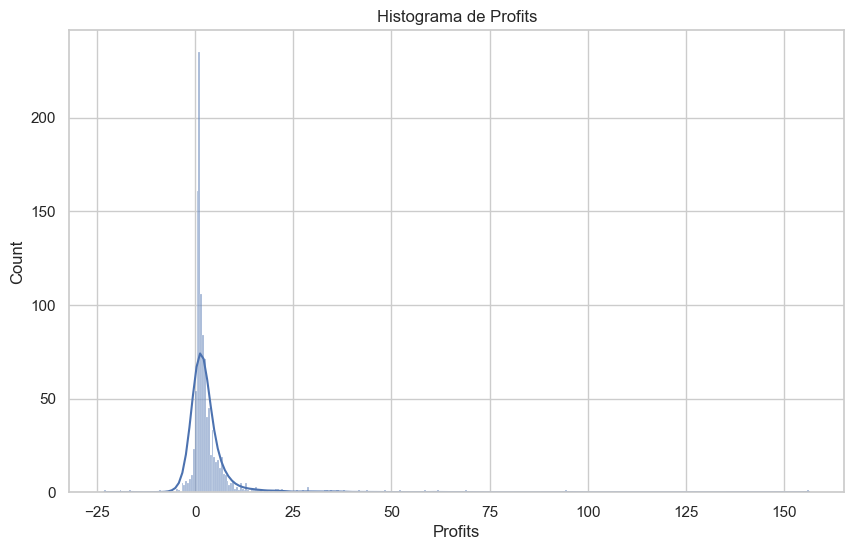

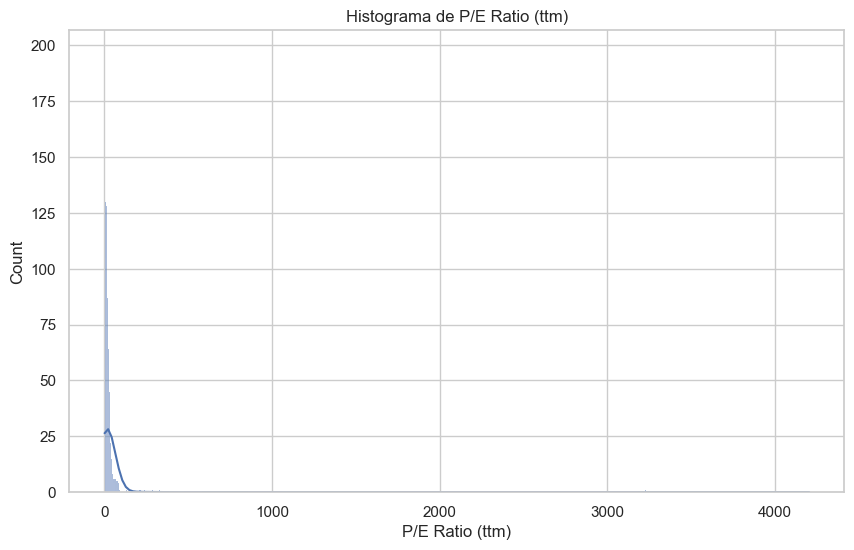

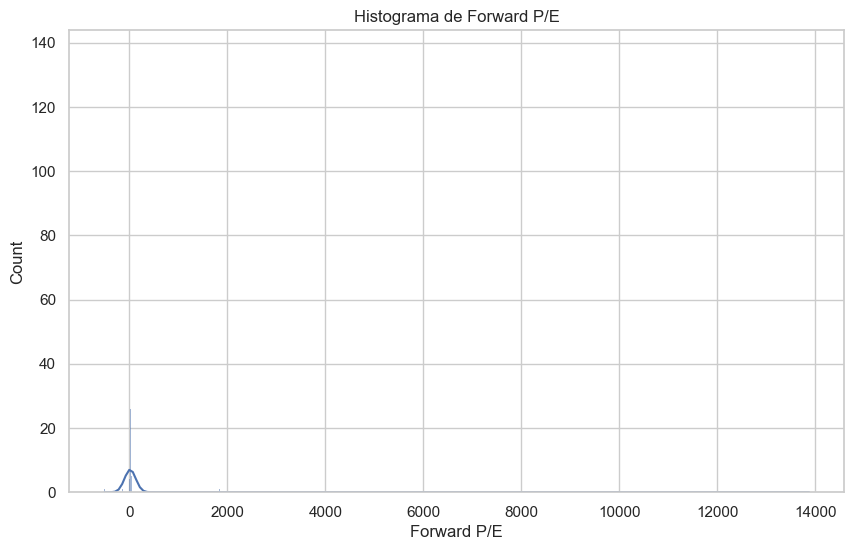

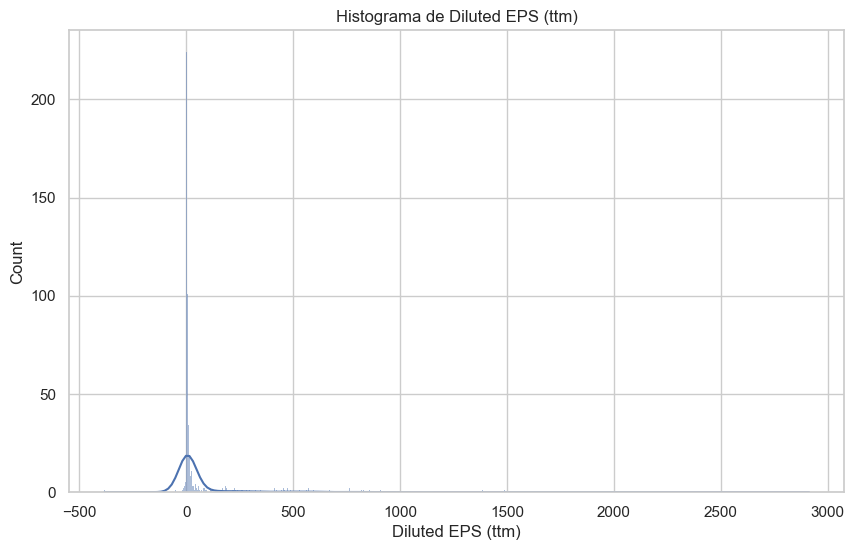

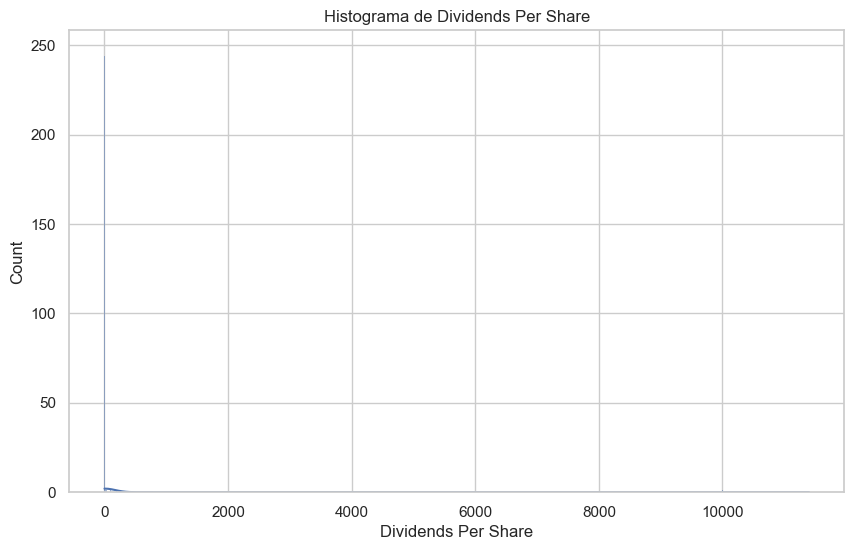

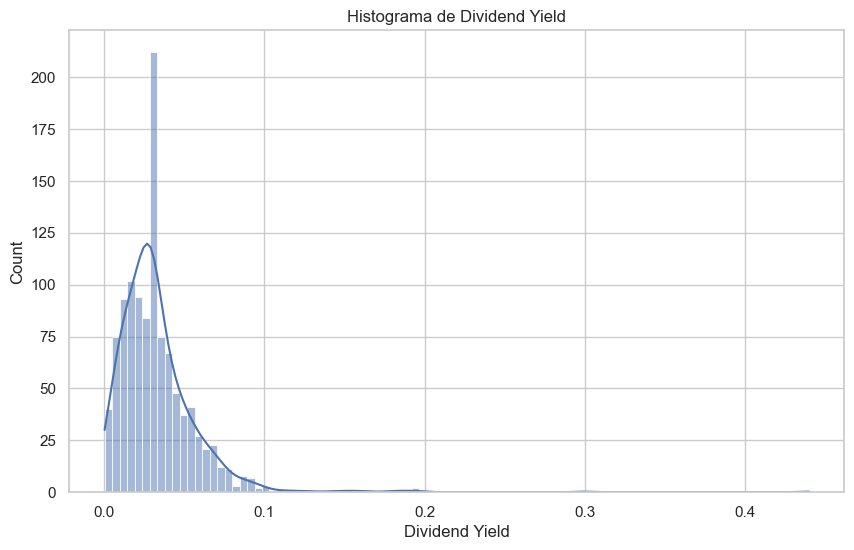

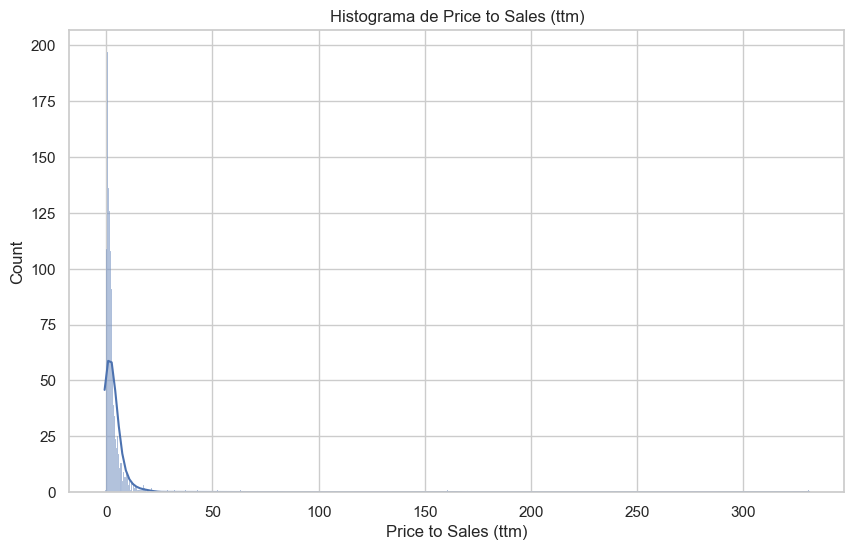

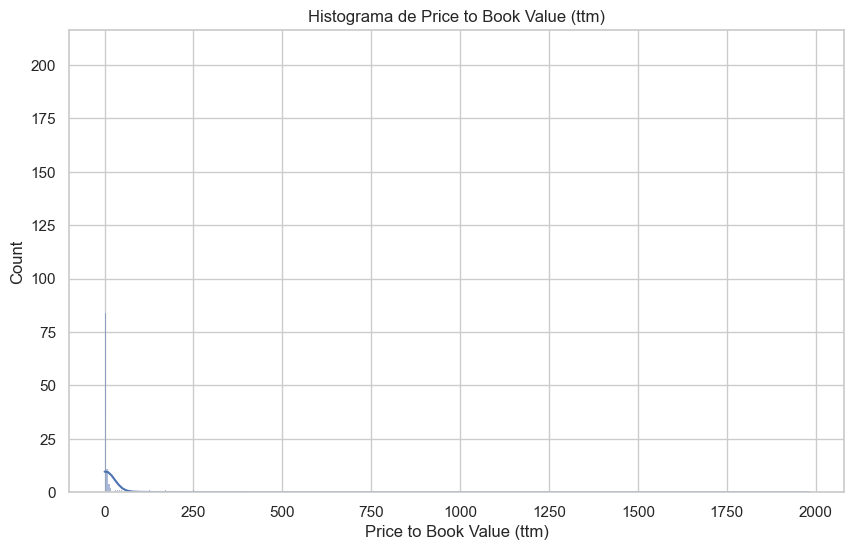

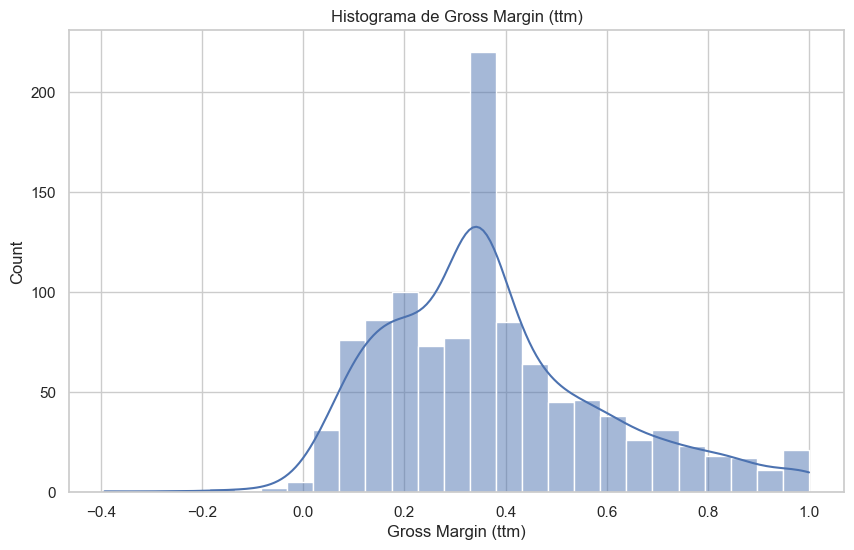

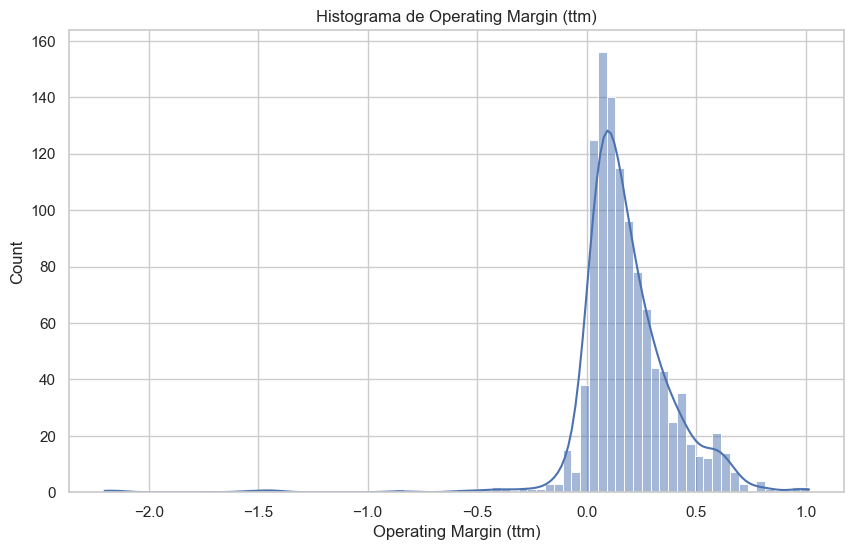

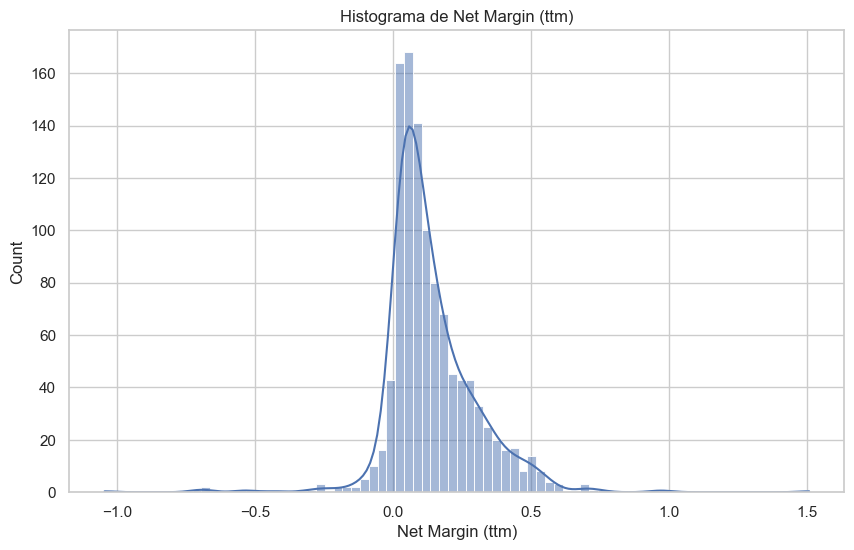

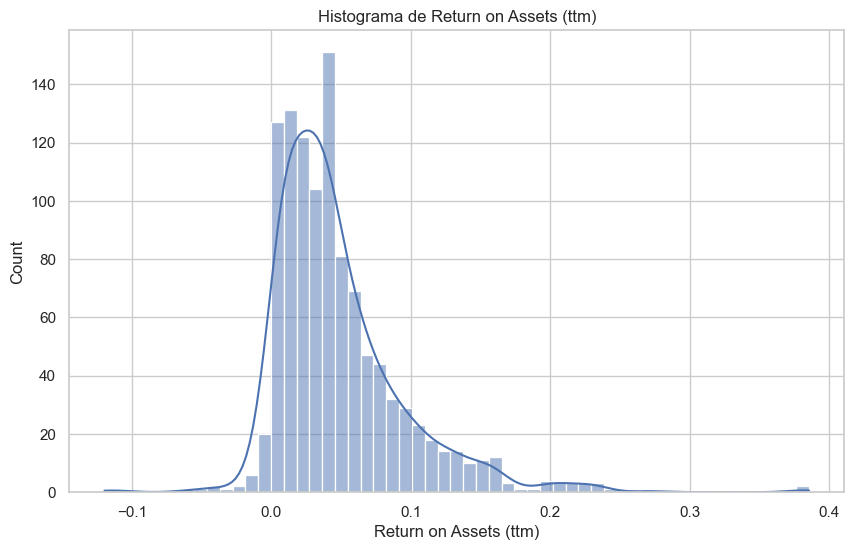

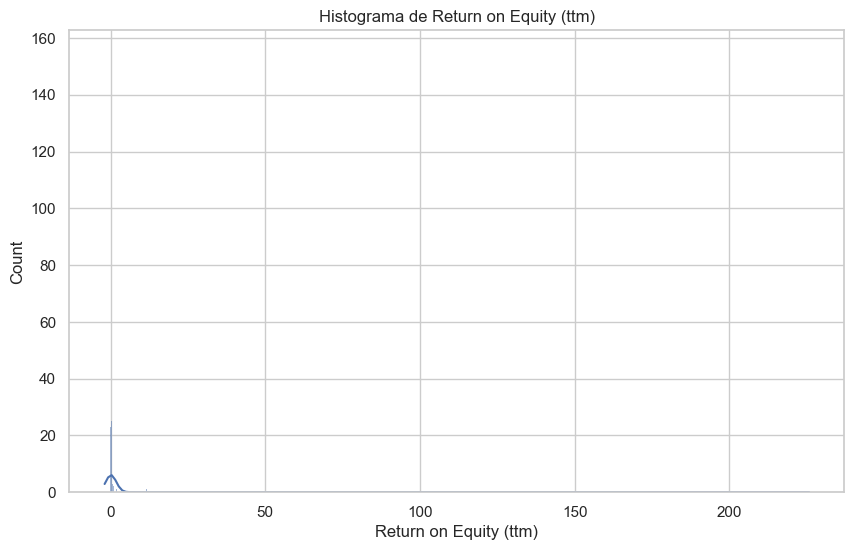

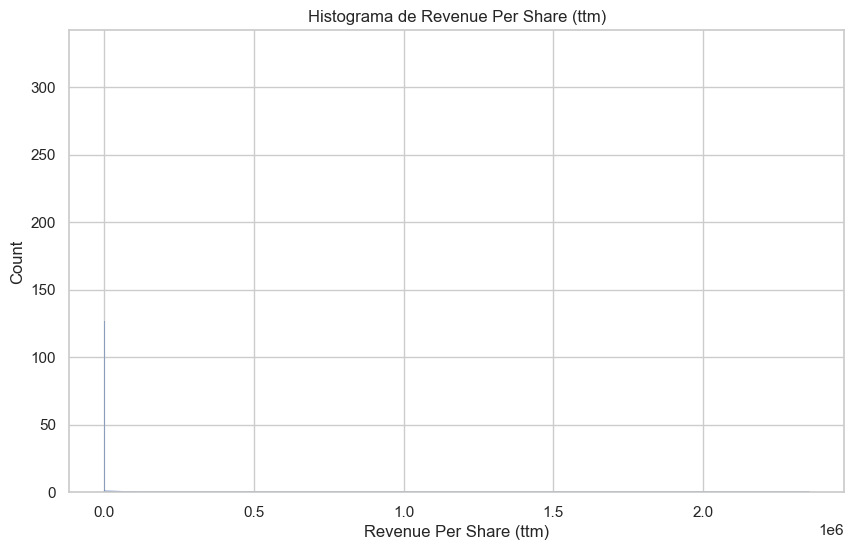

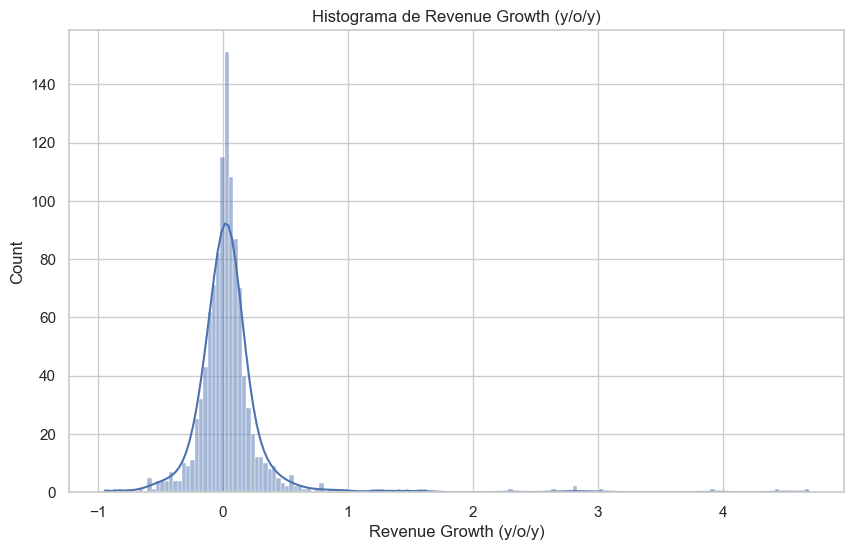

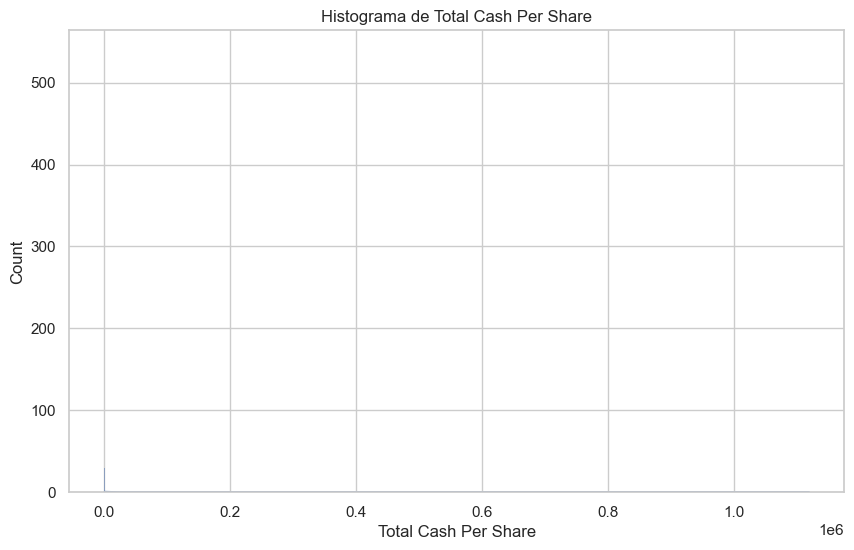

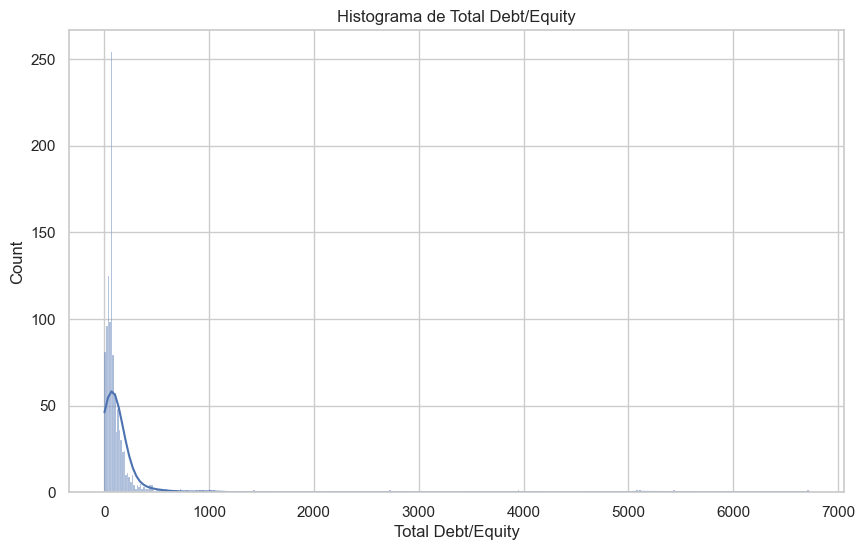

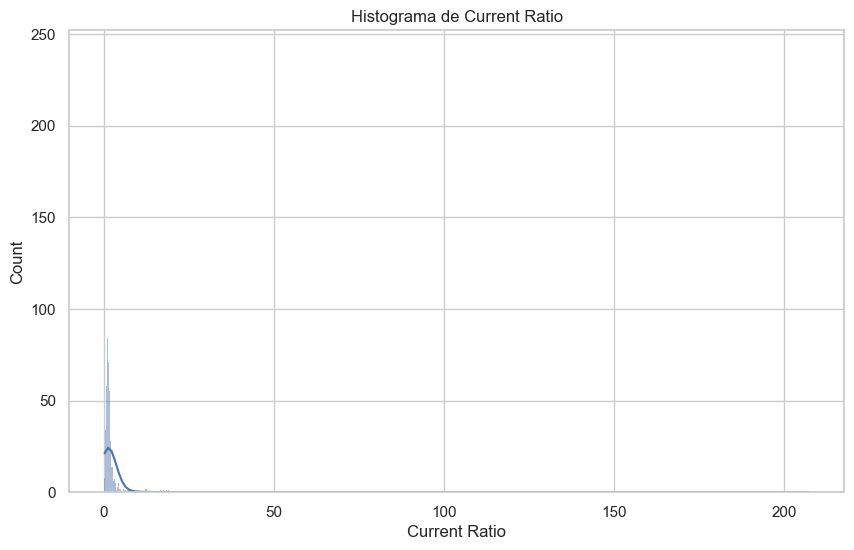

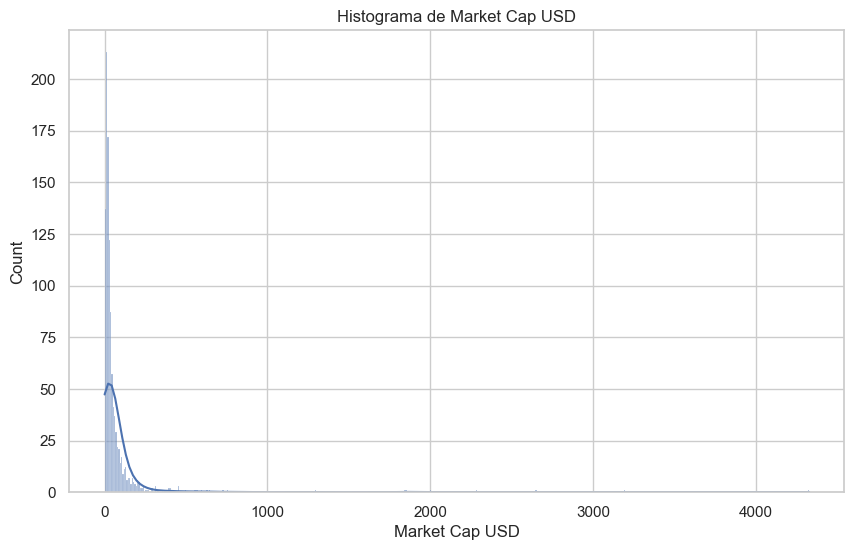

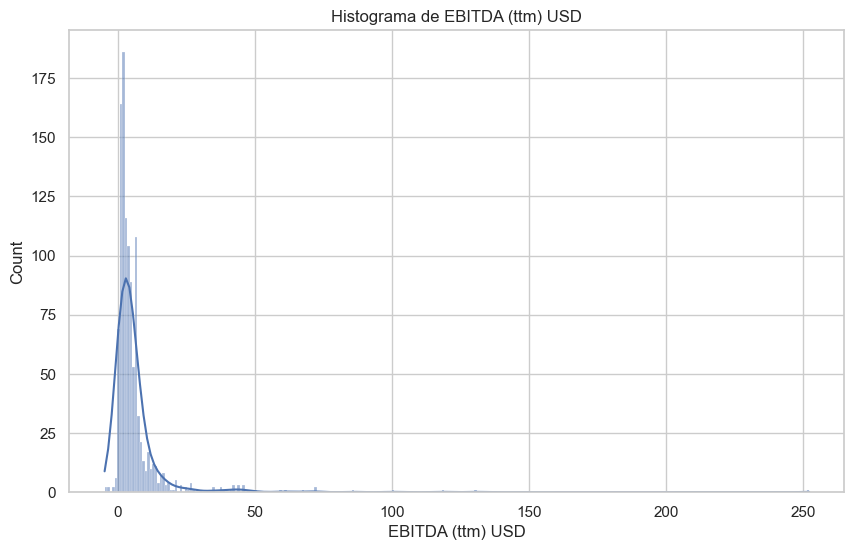

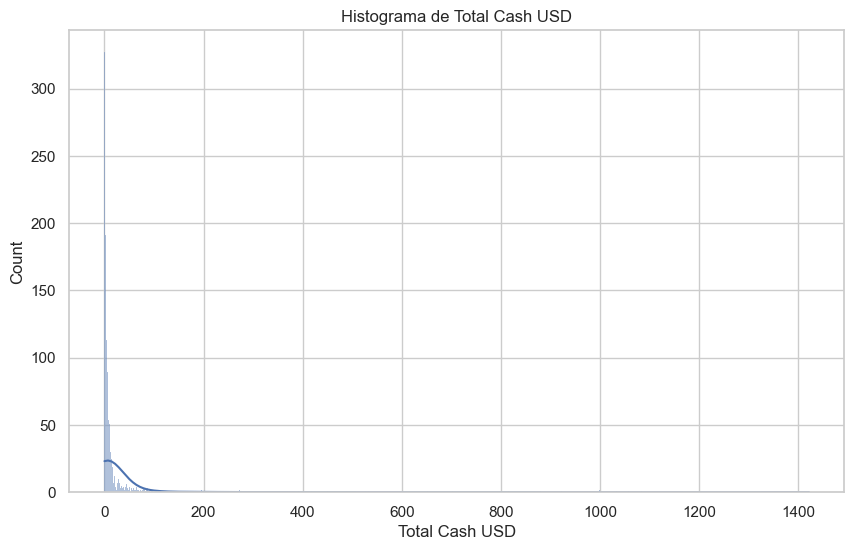

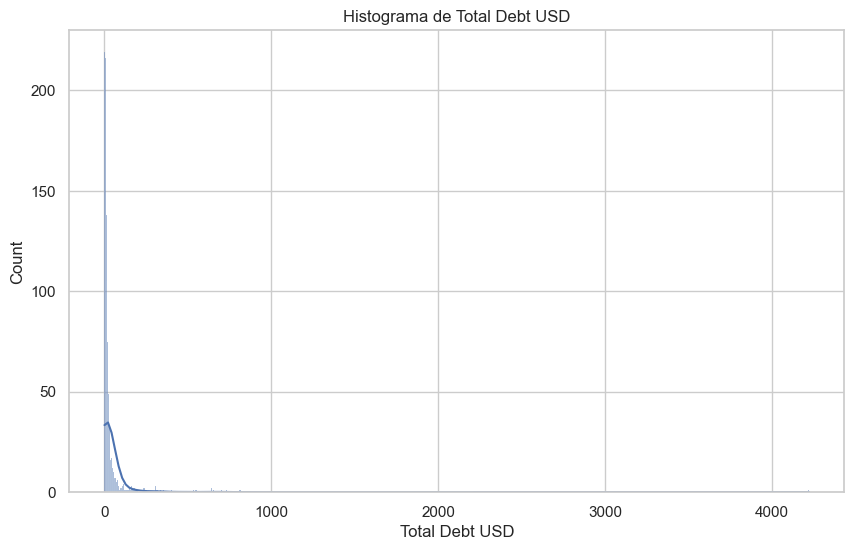

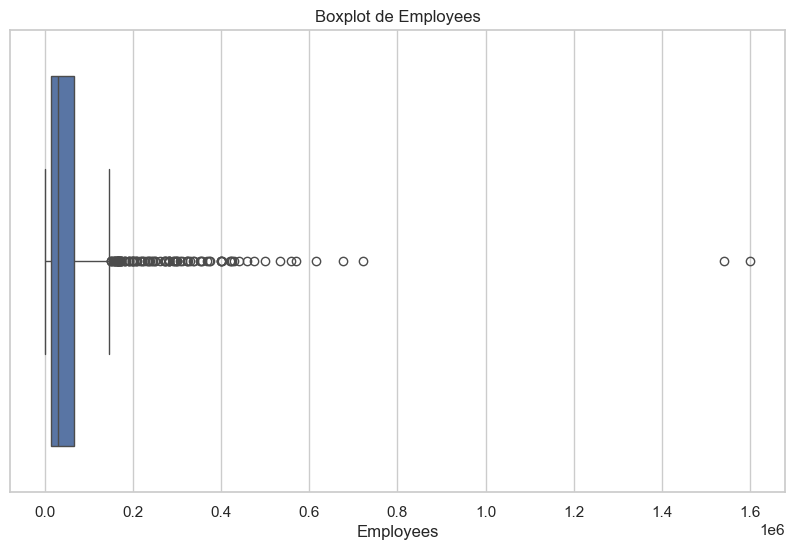

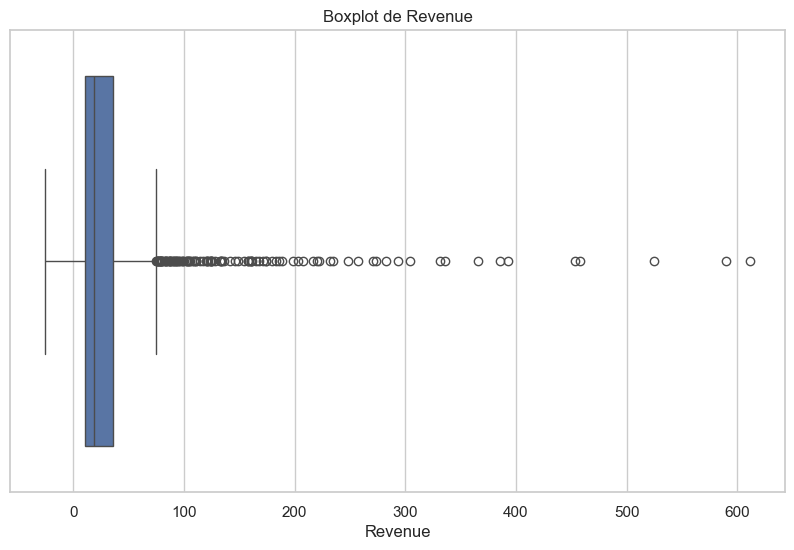

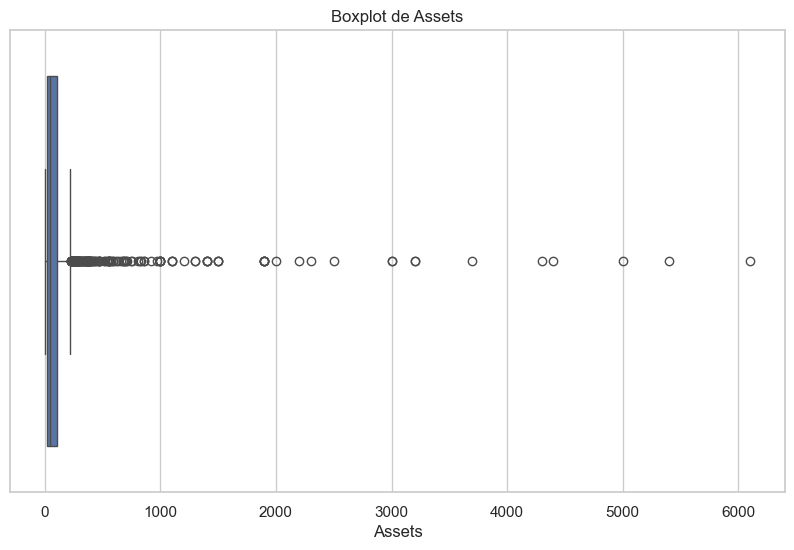

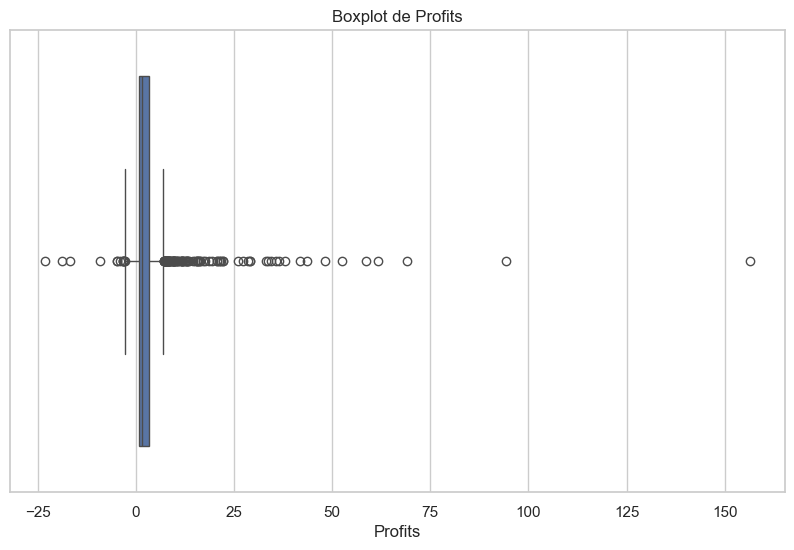

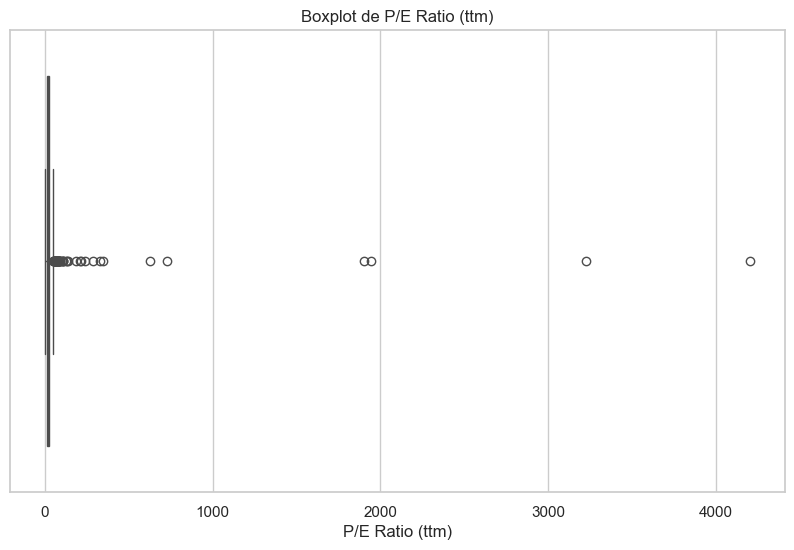

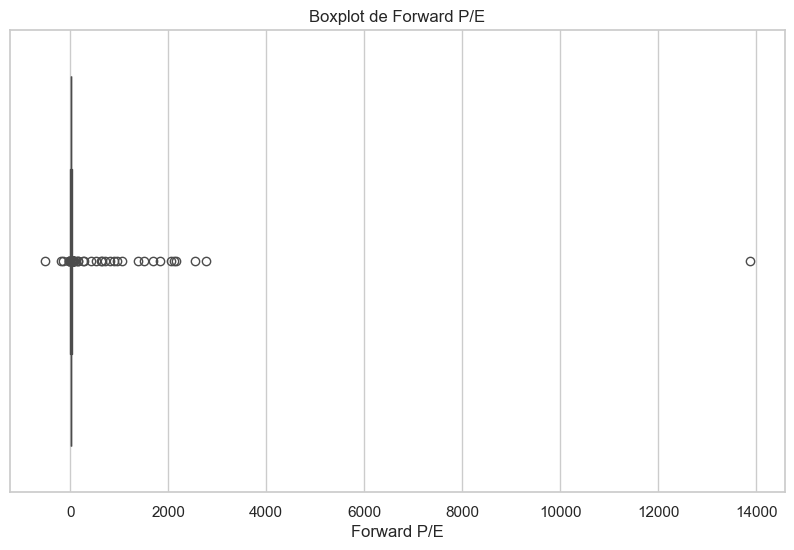

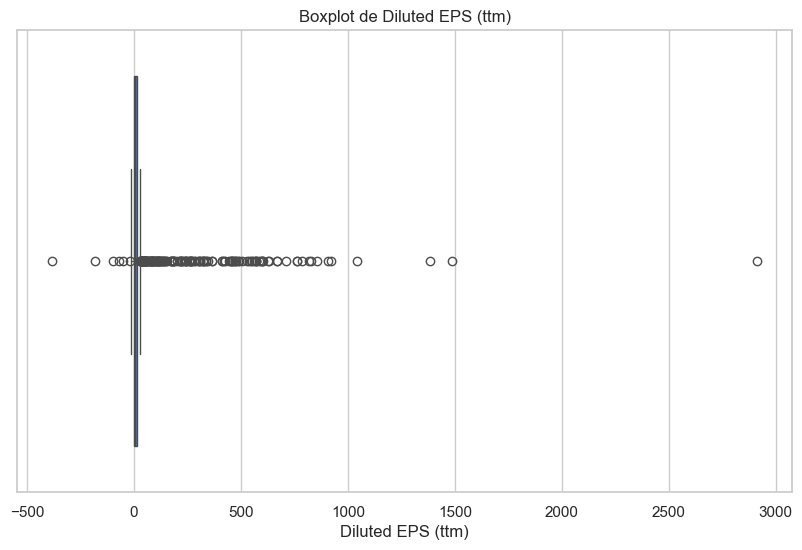

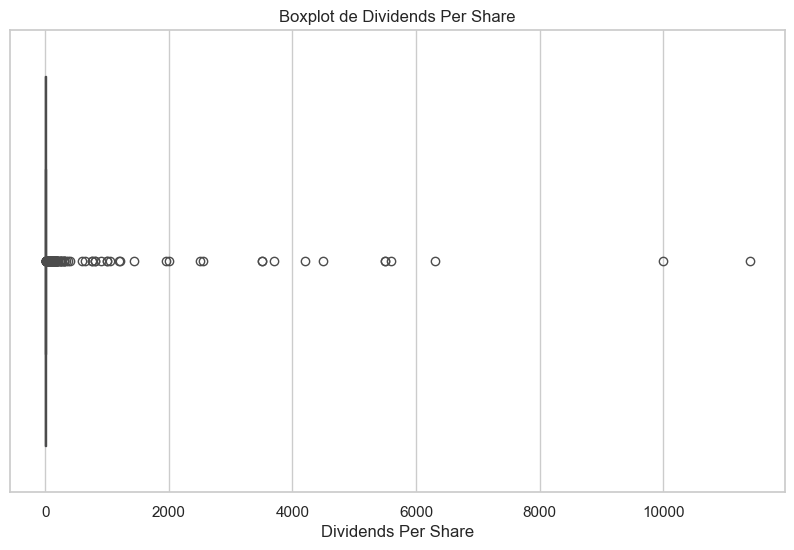

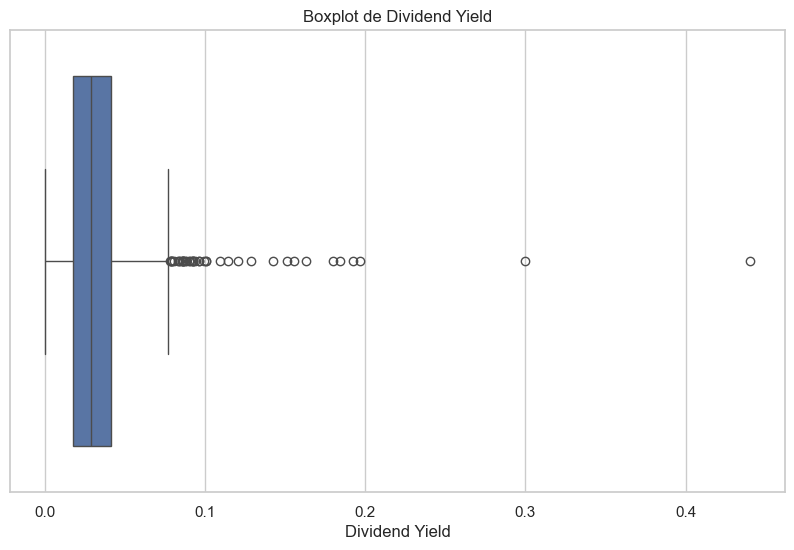

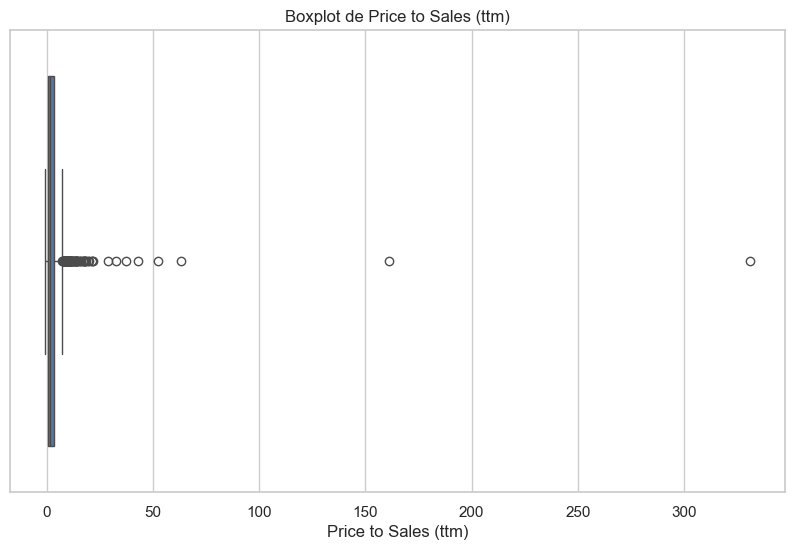

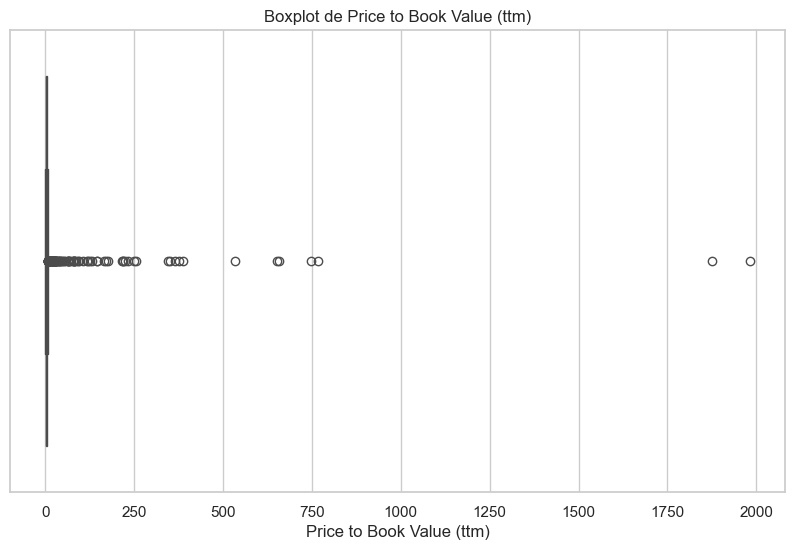

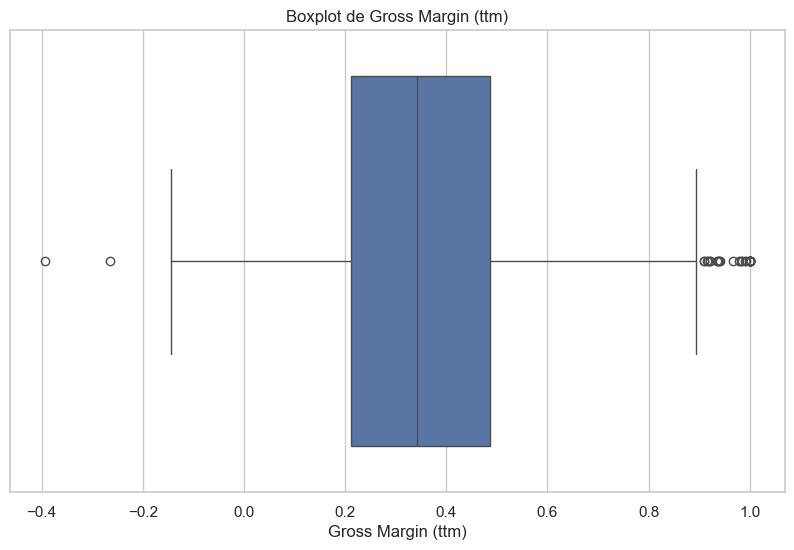

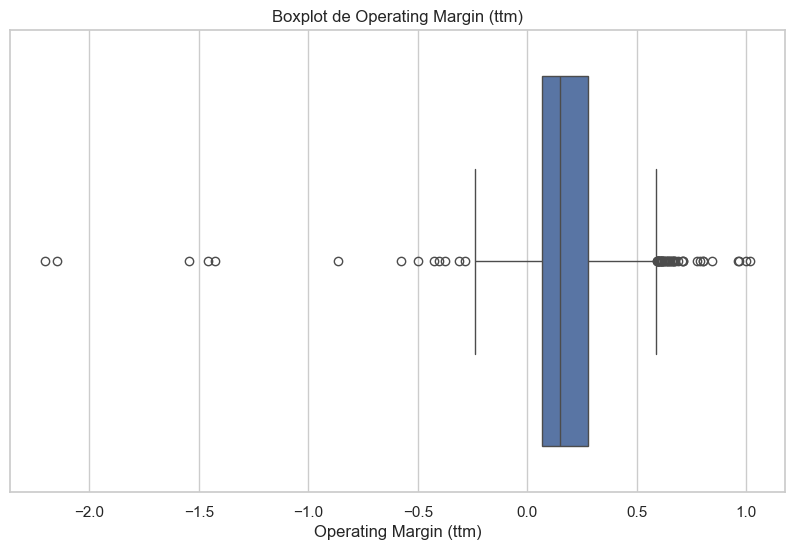

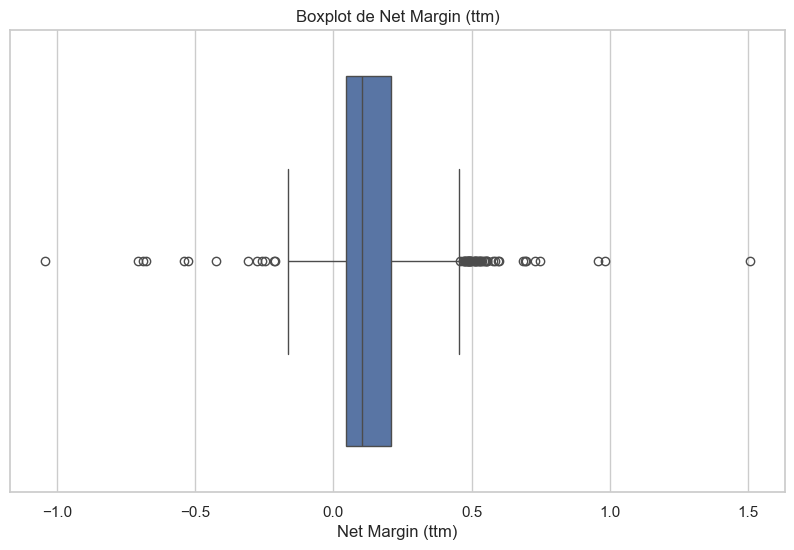

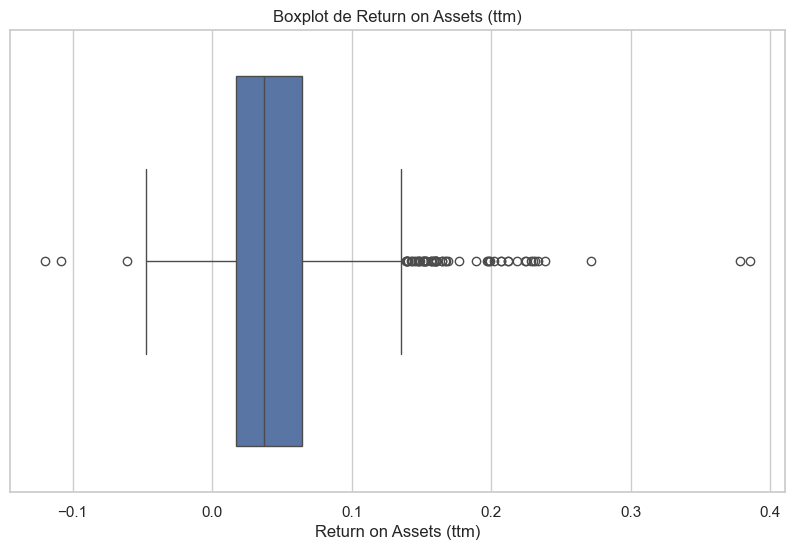

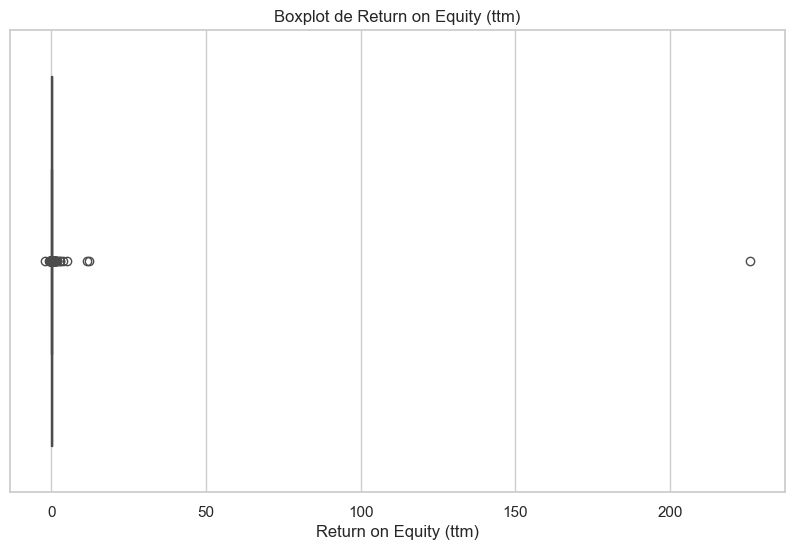

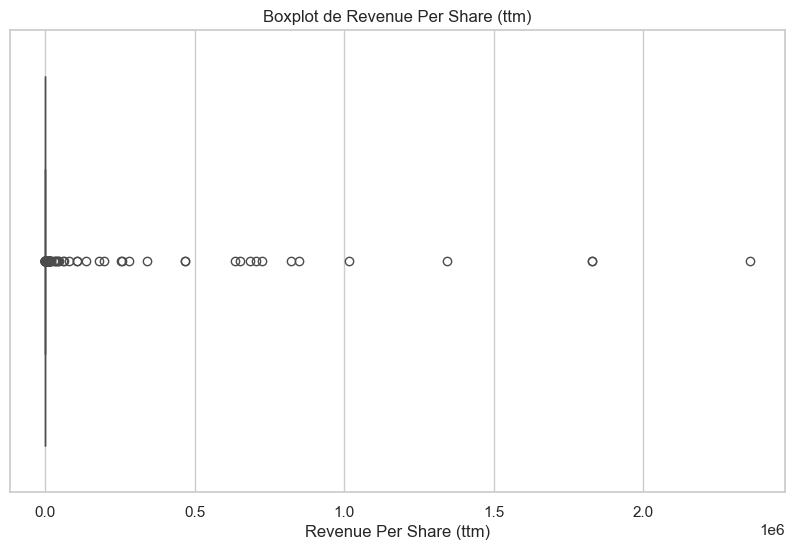

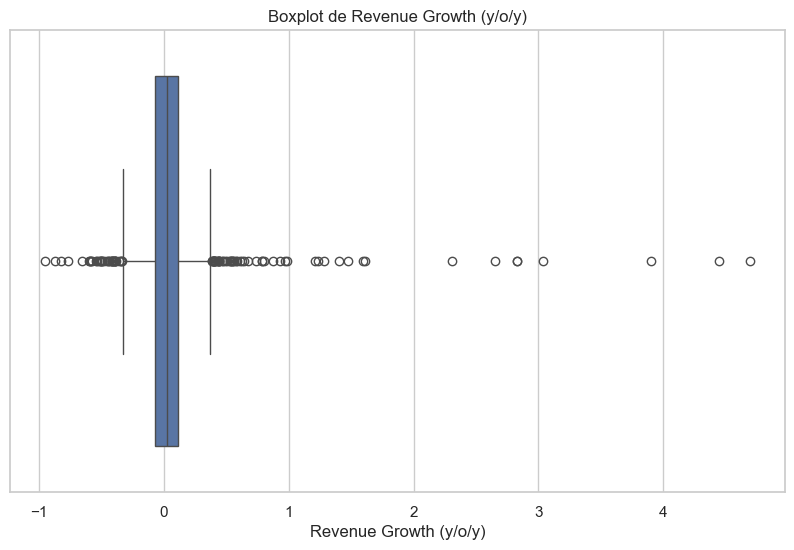

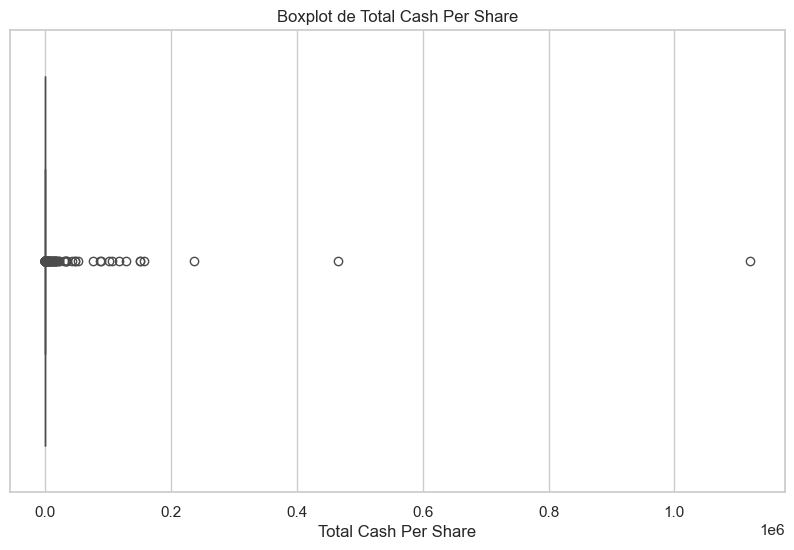

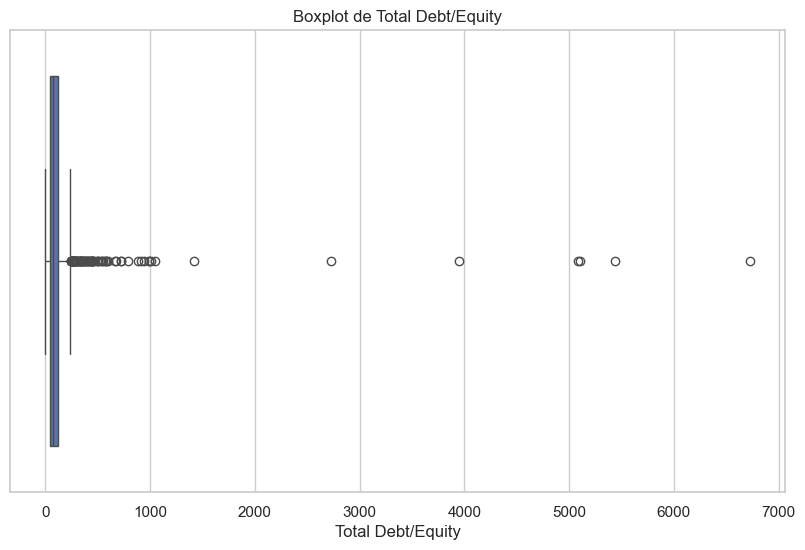

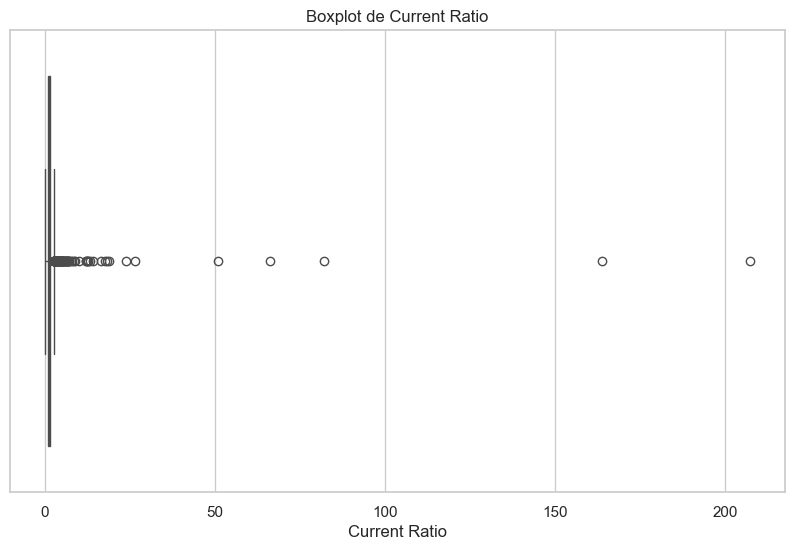

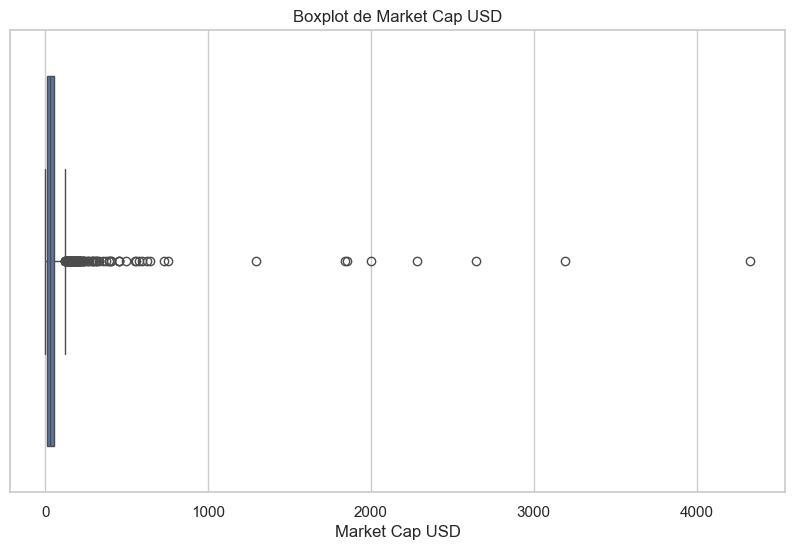

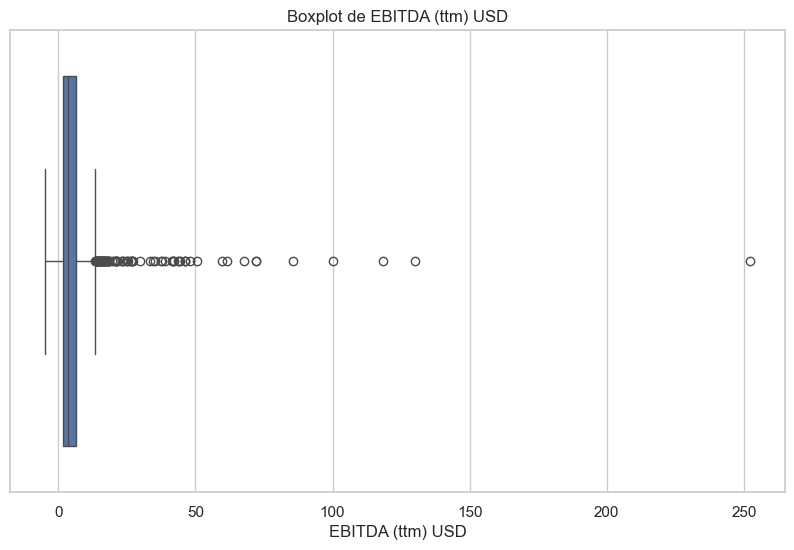

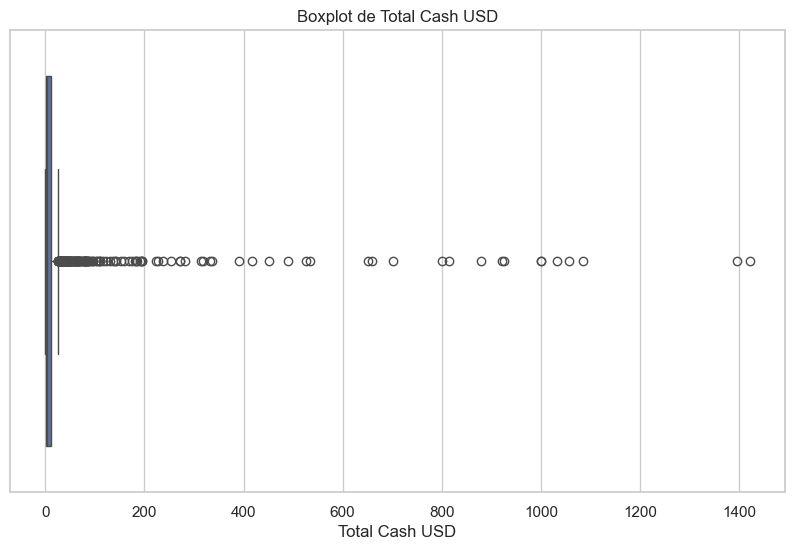

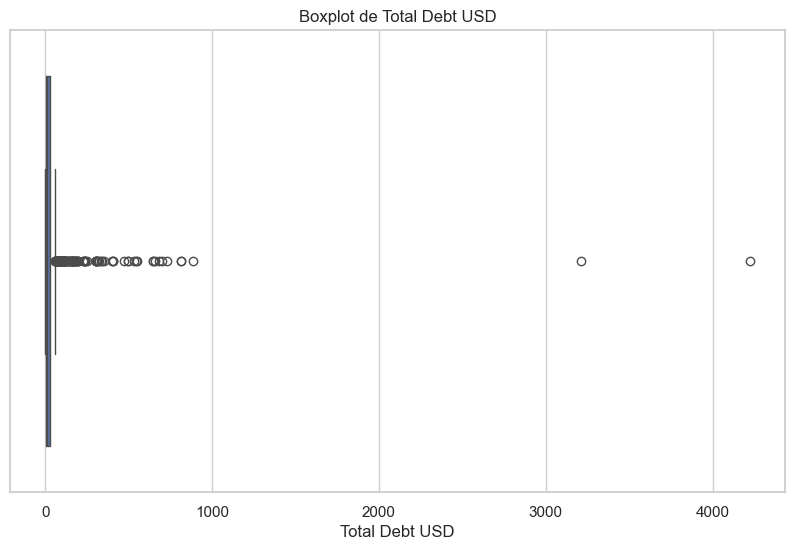

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Histogramas para las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_datos_finales_limpio[columna], kde=True)
    plt.title(f'Histograma de {columna}')
    plt.show()

# Boxplots para las columnas numéricas
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_datos_finales_limpio[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

In [40]:
# Frecuencia de categorías en 'Industry'
print(df_datos_finales_limpio['Industry'].value_counts())

# Frecuencia de categorías en 'Country/Territory'
print(df_datos_finales_limpio['Country/Territory'].value_counts())

Industry
Banking                           89
Banking and Financial Services    70
Utilities                         66
Insurance                         59
Diversified Financials            48
                                  ..
Superstores                        1
Department Stores                  1
Auto Parts                         1
Drugs & Biotechnology              1
Food & Drink                       1
Name: count, Length: 64, dtype: int64
Country/Territory
United States     384
China             159
Japan             120
United Kingdom     45
Canada             33
France             31
South Korea        30
India              29
Germany            27
Taiwan             26
Switzerland        21
Australia          19
Spain              15
Italy              15
Sweden             14
Netherlands        13
Ireland            10
Thailand            9
Brazil              9
Hong Kong           9
Mexico              9
Finland             7
Turkey              6
Greece              5


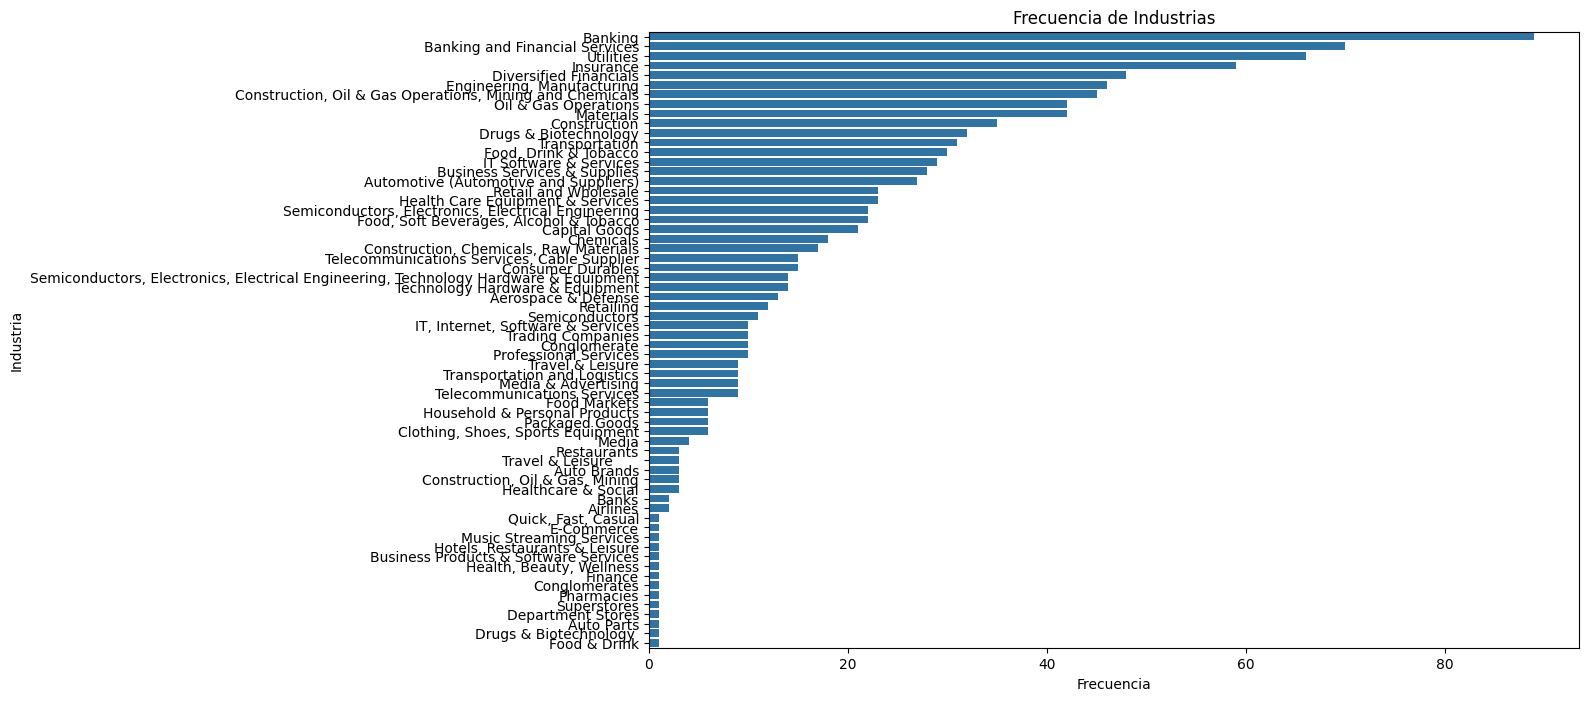

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener un tamaño de muestra manejable para visualización o considera agrupar categorías menos frecuentes
plt.figure(figsize=(12, 8))
sns.countplot(y='Industry', data=df_datos_finales_limpio, order = df_datos_finales_limpio['Industry'].value_counts().index)
plt.title('Frecuencia de Industrias')
plt.xlabel('Frecuencia')
plt.ylabel('Industria')
plt.show()

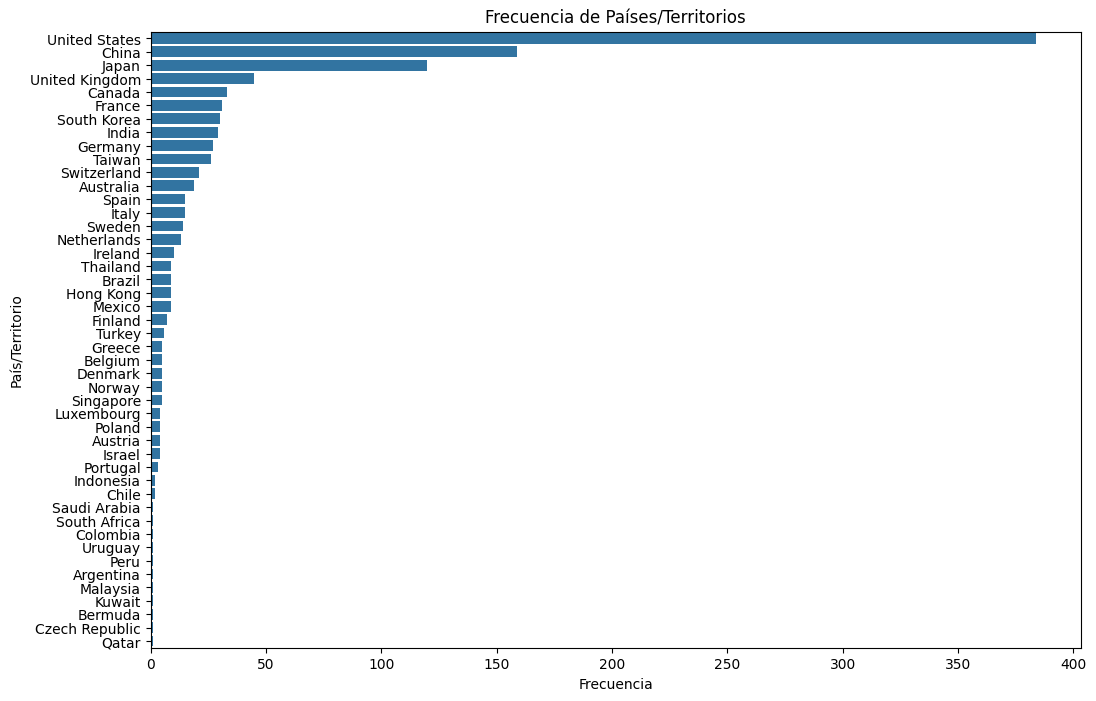

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country/Territory', data=df_datos_finales_limpio, order = df_datos_finales_limpio['Country/Territory'].value_counts().index)
plt.title('Frecuencia de Países/Territorios')
plt.xlabel('Frecuencia')
plt.ylabel('País/Territorio')
plt.show()

In [90]:
import re

def extract_segments(description):
    match = re.search(r'segments:(.*?)[.]', description, re.IGNORECASE)
    if match:
        return match.group(1).strip()
    return None  # Retorna None si no hay coincidencia

In [91]:
# Aplica la función a la columna 'description' y crea la nueva columna 'business_segments'
df_datos_finales_limpio['business_segments'] = df_datos_finales_limpio['description'].apply(extract_segments)
df_datos_finales_limpio.head()

,company_name,Ticker1,description,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,...,Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments
0,JPMorgan Chase,JPM,JPMorgan Chase & Co. is a financial holding co...,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,...,49.687,0.111,493.447,72.5415,1.299,573.366403,6.448000,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,Saudi Arabian Oil Co. engages in the explorati...,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,...,7.673,-0.057,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate"
2,ICBC,601398.SS,Industrial & Commercial Bank of China Ltd. eng...,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,...,0.714,-0.021,16.785,72.5415,1.299,253.621212,0.947856,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ..."
3,China Construction Bank,601939.SS,China Construction Bank Corp. engages in the p...,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,...,2.715,0.035,9.131,72.5415,1.299,167.292783,0.947856,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,..."
4,Agricultural Bank of China,601288.SS,Agricultural Bank of China engages in the prov...,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,...,1.673,0.036,17.970,72.5415,1.299,208.051584,0.947856,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ..."


In [92]:
# Drop las columnas que ya no necesitamos 'Market Cap', 'EBITDA (ttm)', 'Total Cash', 'Total Debt' 
df_datos_finales_limpio.drop(['description', 'Financial Currency'], axis=1, inplace=True)

df_datos_finales_limpio

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.900,3700.0,41.8000,Financial Services,12.257389,...,49.687,0.111,493.447,72.5415,1.299,573.366403,6.448000,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.500,661.0,156.4000,Energy,16.684492,...,7.673,-0.057,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate"
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.800,6100.0,52.5000,Financial Services,5.381443,...,0.714,-0.021,16.785,72.5415,1.299,253.621212,0.947856,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.100,5000.0,48.3000,Financial Services,5.160306,...,2.715,0.035,9.131,72.5415,1.299,167.292783,0.947856,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.100,5400.0,37.9000,Financial Services,5.830986,...,1.673,0.036,17.970,72.5415,1.299,208.051584,0.947856,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Hengyi Petrochemical,600000.SS,Household & Personal Products,China,15637.0,21.400,15.6,-0.2592,Financial Services,6.698113,...,5.056,2.825,45.358,72.5415,1.299,30.634890,0.947856,195.706689,302.500722,None
1172,Orient Securities,600958.SS,Diversified Financials,China,8391.0,2.500,52.9,0.4031,Financial Services,20.348837,...,1.864,-0.497,22.957,199.4340,1.299,10.064842,0.947856,28.673031,23.070408,Securities Sales and Trading; Investment Manag...
1173,Tokyo Kiraboshi Financial Group,8604.T,Banking,Japan,2753.0,0.843,49.9,0.1762,Financial Services,26.615301,...,476.592,0.017,9912.335,994.4160,1.318,26.859201,0.058677,271.907288,304.111316,None
1174,Jinshang Bank,601669.SS,Banking,China,4402.0,1.900,48.4,0.2740,Industrials,7.830769,...,32.007,0.065,6.070,171.3370,0.926,12.889159,6.909047,15.371780,66.736052,"Corporate Banking, Retail Banking, Treasury Bu..."


In [93]:
# Count null por columna
null_counts = df_datos_finales_limpio.isnull().sum()
# Imprimir los resultados
print(null_counts)

company_name                   0
Ticker1                        0
Industry                       3
Country/Territory              0
Employees                      0
Revenue                        0
Assets                         0
Profits                        0
Sector                         0
P/E Ratio (ttm)                0
Forward P/E                    0
Diluted EPS (ttm)              0
Dividends Per Share            0
Dividend Yield                 0
Price to Sales (ttm)           0
Price to Book Value (ttm)      0
Gross Margin (ttm)             0
Operating Margin (ttm)         0
Net Margin (ttm)               0
Return on Assets (ttm)         0
Return on Equity (ttm)         0
Revenue Per Share (ttm)        0
Revenue Growth (y/o/y)         0
Total Cash Per Share           0
Total Debt/Equity              0
Current Ratio                  0
Market Cap USD                 0
EBITDA (ttm) USD               0
Total Cash USD                 0
Total Debt USD                 0
business_s

In [94]:
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_segmentos.csv"
# Save the DataFrame as a CSV file
df_datos_finales_limpio.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\data\processed\df_segmentos.csv


In [95]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\df_segmentos.csv"
# Load the Excel file into a DataFrame
df_datos_segmentos = pd.read_csv(excel_file_path)
# Display the DataFrame
df_datos_segmentos.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,49.687,0.111,493.447,72.5415,1.299,573.366403,6.448000,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,7.673,-0.057,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate"
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,0.714,-0.021,16.785,72.5415,1.299,253.621212,0.947856,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,2.715,0.035,9.131,72.5415,1.299,167.292783,0.947856,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,1.673,0.036,17.970,72.5415,1.299,208.051584,0.947856,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ..."


### Analisis de los segmentos

In [97]:
# Contar y listar las categorías únicas en la columna 'business_segments'
categorias_unicas = df_datos_segmentos['business_segments'].unique()
num_categorias = len(categorias_unicas)

categorias_unicas, num_categorias

(array(['Consumer and Community Banking, Corporate and Investment Bank, Commercial Banking and Asset and Wealth Management',
        'Upstream, Downstream, and Corporate',
        'Corporate Banking, Personal Banking, Treasury Operations, and Others',
        'Corporate Banking, Personal Banking, Treasury, and Others',
        'Corporate Banking, Personal Banking, Treasury Operations and Others & Unallocated',
        'Consumer Banking, Global Wealth and Investment Management, Global Banking, Global Markets, and All Other',
        nan, 'Upstream, Downstream and Chemical',
        'Productivity and Business Processes; Intelligent Cloud; and More Personal Computing',
        'Americas, Europe, Greater China, Japan, and Rest of Asia Pacific',
        'Integrated Gas, Upstream, Downstream, and Corporate',
        'Corporate Banking, Personal Banking, Treasury Operations, Investment Banking, Insurance, and Others',
        'Automotive, Financial Services, and All Other',
        'UnitedHea

In [98]:
# Contar la frecuencia de cada categoría en la columna 'business_segments'
frecuencia_categorias = df_datos_segmentos['business_segments'].value_counts()

frecuencia_categorias

business_segments
U                                                                                                                                      13
Consumer and Community Banking, Corporate and Investment Bank, Commercial Banking and Asset and Wealth Management                       1
Consumer Banking, Corporate Banking, Market Trading, Kansai Mirai Financial Group, and Others                                           1
Electronics Manufacturing Services and Diversified Manufacturing Services                                                               1
Americas; Europe; Asia; Asset management; and Holding and Other Activities                                                              1
                                                                                                                                       ..
Banking, Financial Services, & Insurance; Manufacturing; Retail & Consumer Business; Communication, Media, & Technology; and Others     1
Large Corporates

In [99]:
# Conteo de segmentos únicos
from collections import Counter

# Asegurarse de que todos los valores son cadenas antes de intentar dividirlos
df_datos_segmentos['segment_list'] = df_datos_segmentos['business_segments'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# Extraer todos los segmentos en una lista única
all_segments = [segment for sublist in df_datos_segmentos['segment_list'] for segment in sublist]

# Obtener segmentos únicos y realizar el conteo
unique_segments = set(all_segments)
segment_counts = Counter(all_segments)

# Convertir el conteo a DataFrame para una mejor visualización
segment_counts_df = pd.DataFrame(list(segment_counts.items()), columns=['Segment', 'Count']).sort_values(by='Count', ascending=False)

print("Número de segmentos únicos:", len(unique_segments))
print(segment_counts_df)

Número de segmentos únicos: 1897
                                                Segment  Count
9                                            and Others     83
36                                            and Other     38
83                                                    U     21
20                                               Europe     17
260                                      Retail Banking     17
...                                                 ...    ...
702                Property & Casualty Other Operations      1
701                                    Commercial Lines      1
700                                           Openreach      1
699                                          Enterprise      1
1896  Securities Sales and Trading; Investment Manag...      1

[1897 rows x 2 columns]


In [100]:
segment_counts_df

,Segment,Count
9,and Others,83
36,and Other,38
83,U,21
20,Europe,17
260,Retail Banking,17
...,...,...
702,Property & Casualty Other Operations,1
701,Commercial Lines,1
700,Openreach,1
699,Enterprise,1


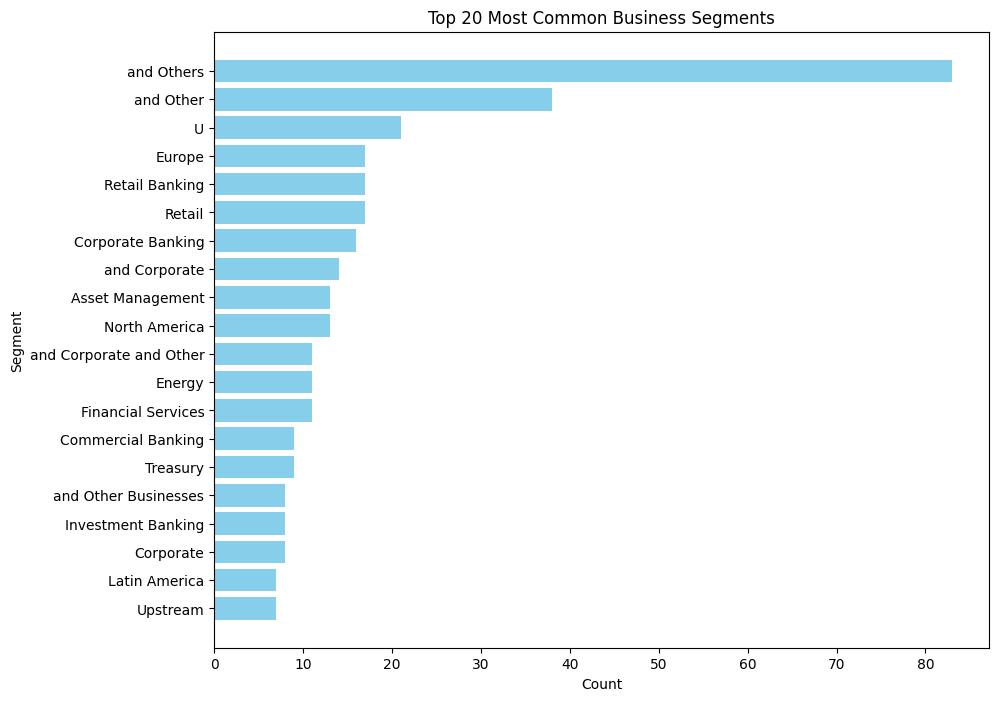

In [101]:
# Ordenamos los valores por 'Count' en orden descendente y seleccionamos los top 20
top_segments = segment_counts_df.sort_values('Count', ascending=False).head(20)

# Creación del gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_segments['Segment'], top_segments['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Segment')
plt.title('Top 20 Most Common Business Segments')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el segmento con el mayor count esté en la parte superior
plt.show()

Hay un total de 1897 segmentos únicos en la columna 'business_segments'.

 Este es un número bastante alto, lo que podría complicar la construcción de modelos predictivos eficientes debido a la gran variedad de etiquetas.

Dada la cantidad de categorías, podría ser conveniente considerar la consolidación de algunas de ellas para simplificar el modelo y posiblemente mejorar su desempeño. Podríamos agrupar segmentos similares o aquellos que tienen poca representación en el dataset. Esta agrupación puede basarse en similitudes en las actividades de negocio o en la frecuencia de aparición en el dataset.

El siguiente paso será revisar la distribución de estas categorías para ver cuán desbalanceadas están. Esto nos ayudará a decidir si necesitamos aplicar técnicas como el agrupamiento de categorías menos frecuentes. Vamos a contar cuántas veces aparece cada categoría en el dataset.

Algunos segmentos parecen tener nombres muy específicos o contener descripciones adicionales como "and Others" o "and Other".
Aquí están los cinco segmentos más comunes y su frecuencia de aparición, vamos a realizar una homologación de los segmentos para reducir su número:

In [102]:
# Cargar el archivo de homologación de segmentos
df_homologacion_segmentos = pd.read_excel('C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\external\\Homologación Segmentos.xlsx')

# Mostrar las primeras filas del archivo de homologación para entender su estructura
df_homologacion_segmentos.head()

,company_name,business_segments_homologation
0,JPMorgan Chase,"Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),"Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,"Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,"Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,"Corporate Banking, Personal Banking, Agricultu..."


In [103]:
# Realizar el merge con el DataFrame original
df_datos_segmentos_homologados = pd.merge(df_datos_segmentos, df_homologacion_segmentos, on="company_name", how="left")

# Mostrar las primeras filas del DataFrame resultante para verificar el merge
df_datos_segmentos_homologados.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments,segment_list,business_segments_homologation
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,493.447,72.5415,1.299,573.366403,6.448000,1421.310034,731.371995,"Consumer and Community Banking, Corporate and ...","[Consumer and Community Banking, Corporate and...","Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream, Downstream, and Corporate","[Upstream, Downstream, and Corporate]","Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,16.785,72.5415,1.299,253.621212,0.947856,879.387100,335.063440,"Corporate Banking, Personal Banking, Treasury ...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,9.131,72.5415,1.299,167.292783,0.947856,335.591449,471.762979,"Corporate Banking, Personal Banking, Treasury,...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,17.970,72.5415,1.299,208.051584,0.947856,924.515327,544.144009,"Corporate Banking, Personal Banking, Treasury ...","[Corporate Banking, Personal Banking, Treasury...","Corporate Banking, Personal Banking, Agricultu..."


In [104]:
# Eliminar las columnas no deseadas
df_datos_segmentos_homologados = df_datos_segmentos_homologados.drop(columns=['business_segments'], errors='ignore')

# Dividir los segmentos y extraerlos como una lista única
segmentos_homologados_split = df_datos_segmentos_homologados['business_segments_homologation'].str.split(', ').explode()

# Conteo de segmentos únicos
segmentos_homologados_unicos = segmentos_homologados_split.unique()
conteo_segmentos_homologados = segmentos_homologados_split.value_counts()

(segmentos_homologados_unicos, conteo_segmentos_homologados)

(array(['Investment Banking', 'Asset Management', 'Commercial Banking',
        ..., 'Trading and Brokerage', 'Regional Banking', 'Trust Banking'],
       dtype=object),
 business_segments_homologation
 Asset Management                   133
 Renewable Energy                   108
 Investment Banking                 101
 Digital Banking                     88
 Retail Banking                      88
                                   ... 
 Food Delivery                        1
 Intelligent Logistics Solutions      1
 Automotive Parts                     1
 Paints                               1
 Trust Banking                        1
 Name: count, Length: 2514, dtype: int64)

In [89]:
csv_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\datos_finales.csv"
# Save the DataFrame as a CSV file
df_datos_segmentos_homologados.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column
# Confirmation message
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to C:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\data\processed\datos_finales.csv


In [90]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\datos_finales.csv"
# Load the Excel file into a DataFrame
df = pd.read_csv(excel_file_path)
# Display the DataFrame
df.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,segment_list,business_segments_homologation
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,0.111,493.447,NaN,NaN,573.366403,NaN,1421.310034,731.371995,"['Consumer and Community Banking', 'Corporate ...","Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,-0.057,1.592,16.704,2.304,2000.500446,252.159417,102.104232,76.894523,"['Upstream', 'Downstream', 'and Corporate']","Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,-0.021,16.785,NaN,NaN,253.621212,NaN,879.387100,335.063440,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,0.035,9.131,NaN,NaN,167.292783,NaN,335.591449,471.762979,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,0.036,17.970,NaN,NaN,208.051584,NaN,924.515327,544.144009,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Agricultu..."


labels
Asset Management                   133
Renewable Energy                   108
Investment Banking                 101
Digital Banking                     88
Retail Banking                      88
                                  ... 
Food Delivery                        1
Intelligent Logistics Solutions      1
Automotive Parts                     1
Paints                               1
Trust Banking                        1
Name: count, Length: 2514, dtype: int64


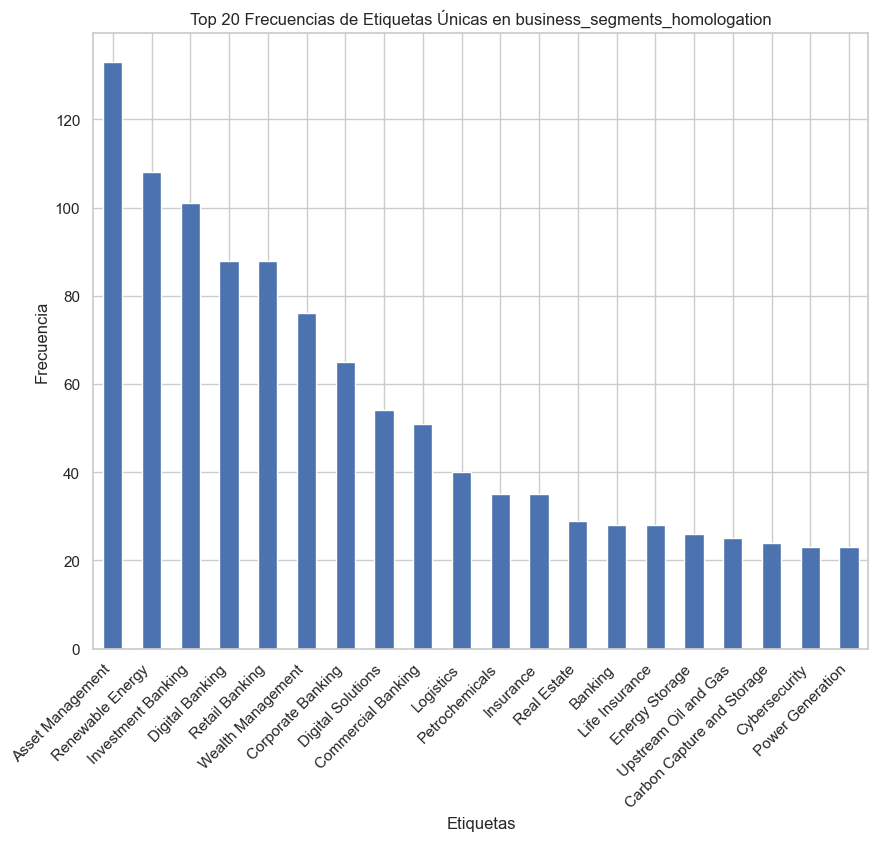

In [91]:
# Asegurarse que la columna de etiquetas sea de tipo string
df['business_segments_homologation'] = df['business_segments_homologation'].astype(str)

# Separar las etiquetas y expandirlas en una lista
df['labels'] = df['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear una serie con todas las etiquetas
all_labels = df['labels'].explode()

# Contar la frecuencia de cada etiqueta
label_counts = all_labels.value_counts()

# Mostrar la tabla de frecuencias ordenada
print(label_counts)

# Graficar las 20 etiquetas más frecuentes
plt.figure(figsize=(10, 8))
label_counts.head(20).plot(kind='bar')
plt.title('Top 20 Frecuencias de Etiquetas Únicas en business_segments_homologation')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()